# MD004 ENTREGA6 ANÁLISIS DE COMPONENTES PRINCIPALES

**Descripción de la tarea:**

El fichero 20230119_DatosBoston incluye datos de precios del mercado de viviendas de Boston (median_value), así como datos adicionales sobre la ubicación de la vivienda y otros datos sociodemográficos. La descripción de las columnas del dataset es la que sigue:

- **crime_index**: Índice de criminalidad de la zona
- **urban_ratio**: Ratio de zona urbana residencial sobre el total
- **industry_ratio**: Ratio de industria de la zona
- **c_river_variable**: 1 si la zona colinda con un río y 0 si no
- **nox_concentration**: Concentración de óxido nitroso en la zona
- **rooms_per_dwelling**: Número de habitaciones medio por vivienda
- **dwelling_age**: “Edad” media de la vivienda
- **dwelling_dist**: Distancia media ponderada con los centros urbanos de la ciudad
- **highway_index**: Índice de accesibilidad sobre autopistas cercanas
- **tax_ratio**: Índice de tasas por cada 10000usd
- **teacher_ratio**: Ratio de alumno por profesor
- **racial_index**: Índice de proporción de población no caucásica
- **lower_status**: Porcentaje de población de “clase-baja”
- **median_value**: Valor medio de precio de la vivienda (En 1000USD)

**Se pide:**

1. **Visualización y familiarización del dataset (2p)**: Se valorará el uso de las técnicas empleadas, así como la explicación de las visualizaciones / estadísticos utilizados en clases anteriores.
2. **Análisis de correlación y de componentes principales (3p)**: Se valorará principalmente la interpretación de dichos análisis así como la “limpieza” de la presentación
3. **Análisis de ANOVA (2p)**: Se valorará principalmente la interpretación del análisis, así como la limpieza de los datos
4. **Desarrollo y justificación de las variables (1p)**: En base a las conclusiones sacadas en los puntos 1, 2, y 3 ¿Qué variables debemos utilizar en nuestro modelo de regresión lineal?
5. **Estudio de regresión lineal del median_value (2p)**: ¿Qué resultados obtenemos en el modelo?,  ¿Predice correctamente?, ¿Utilizarías este modelo en la vida real?  

<font color='red'> **Entrega: fichero Jupyter Notebook con MD004NombreApellidosAC06.ipynb y fichero .pdf con MD004NombreApellidosAC04.pdf** </font>

## Visualización y familiarización del dataset

In [6]:
library(olsrr)
library(tidyverse)
library(caret)
library(lmtest)
library(gridExtra)
library(broom)
library(dplyr)
library(ggplot2)
library(corrplot)
library(rlang)
library(GGally)


Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine



In [7]:
data_bos = read.csv(file='20230119_DatosBoston.csv', header=TRUE, sep=';', dec='.')

In [8]:
head(data_bos)#de forma predefinida retorna las primeras 6 observations
tail(data_bos)#de forma predefinida retorna las últimas 6 observations
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data_bos)
summary(data_bos)
na_counts_per_column <- colSums(is.na(data_bos))
print(na_counts_per_column)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
501,0.22438,0,9.69,0,0.585,6.027,79.7,24.982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,24.786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,22.875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,21.675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,23.889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.505,1,273,21.0,396.90,7.88,11.9


'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12

       crime_index        urban_ratio     industry_ratio   c_river_variable 
                 0                  0                  0                  0 
 nox_concentration rooms_per_dwelling       dwelling_age      dwelling_dist 
                 0                  0                  0                  0 
     highway_index          tax_ratio      teacher_ratio       racial_index 
                 0                  0                  0                  0 
      lower_status       median_value 
                 0                  0 


Vemos como no tenemos nulos, y como a simple vista podemos notar presencias de outliers en variables como racial_index por ejemplo. Por otro lado, la variable crime_index o c_river_variable estan super desproporcionadas.

In [9]:
table(data_bos$c_river_variable)
table(data_bos$highway_index)
table(data_bos$tax_ratio)


  0   1 
471  35 


  1   2   3   4   5   6   7   8  24 
 20  24  38 110 115  26  17  24 132 


187 188 193 198 216 222 223 224 226 233 241 242 243 244 245 247 252 254 255 256 
  1   7   8   1   5   7   5  10   1   9   1   2   4   1   3   4   2   5   1   1 
264 265 270 273 276 277 279 280 281 284 285 287 289 293 296 300 304 305 307 311 
 12   2   7   5   9  11   4   1   4   7   1   8   5   3   8   7  14   4  40   7 
313 315 329 330 334 335 337 345 348 351 352 358 370 384 391 398 402 403 411 422 
  1   2   6  10   2   2   2   3   2   1   2   3   2  11   8  12   2  30   2   1 
430 432 437 469 666 711 
  3   9  15   1 132   5 

Se presencia como la variable river esta desproporcionada, la highway_index podriamos decir que hay dos grupos, > 100 y <40 y en la de tax ratio, vemos como solo una entrada destaca mucho por encima del resto (índice 666).

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


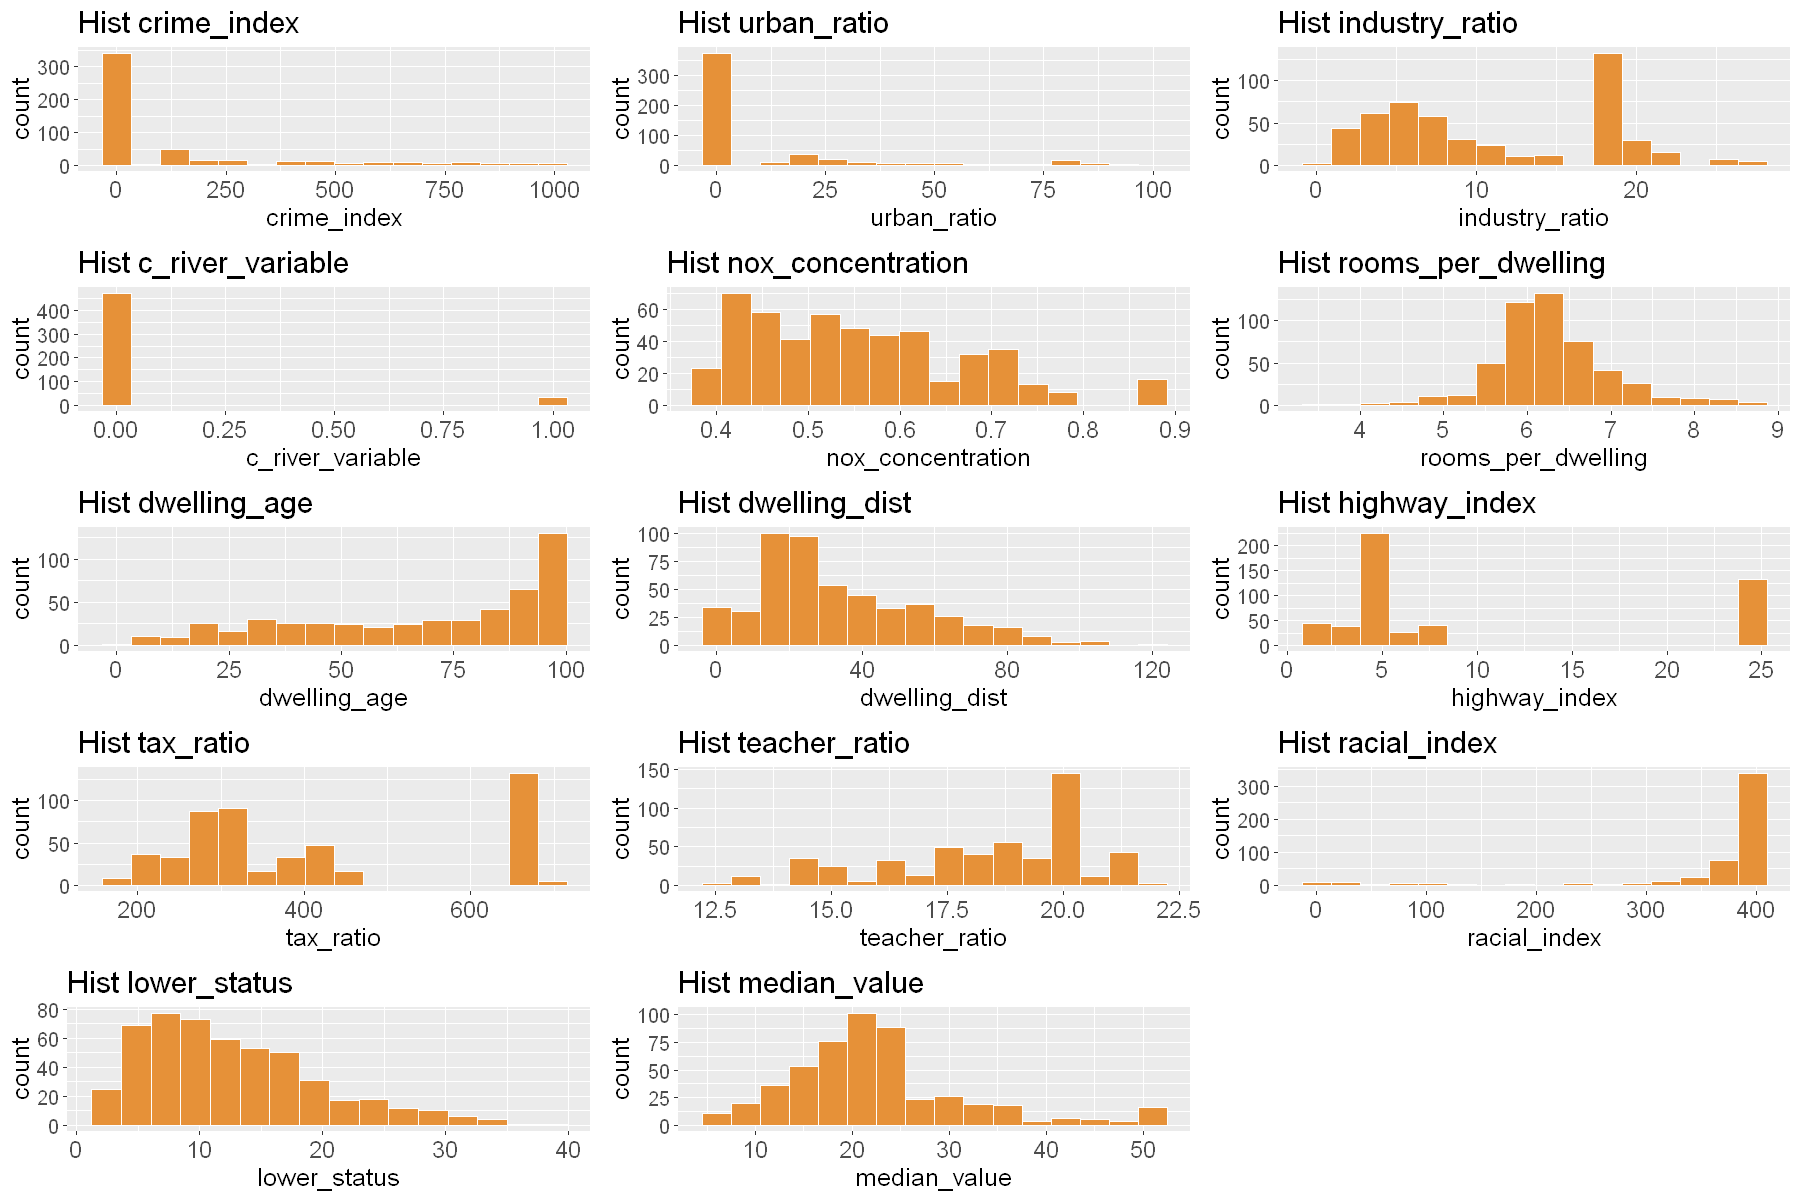

In [10]:
graficos_histograma = list()
var_data = colnames(data_bos)

for (variable in var_data) {

  grafico = ggplot(data_bos) +
    aes_string(x = variable) +
    geom_histogram(bins = 16, fill = '#e69138', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste('Hist', variable))
  

  graficos_histograma[[length(graficos_histograma) + 1]] = grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 10  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 3))

Vemos como ningúna variable sigue una distribución normal, y como algunas tienen valores muy muy extremos y puntuales.

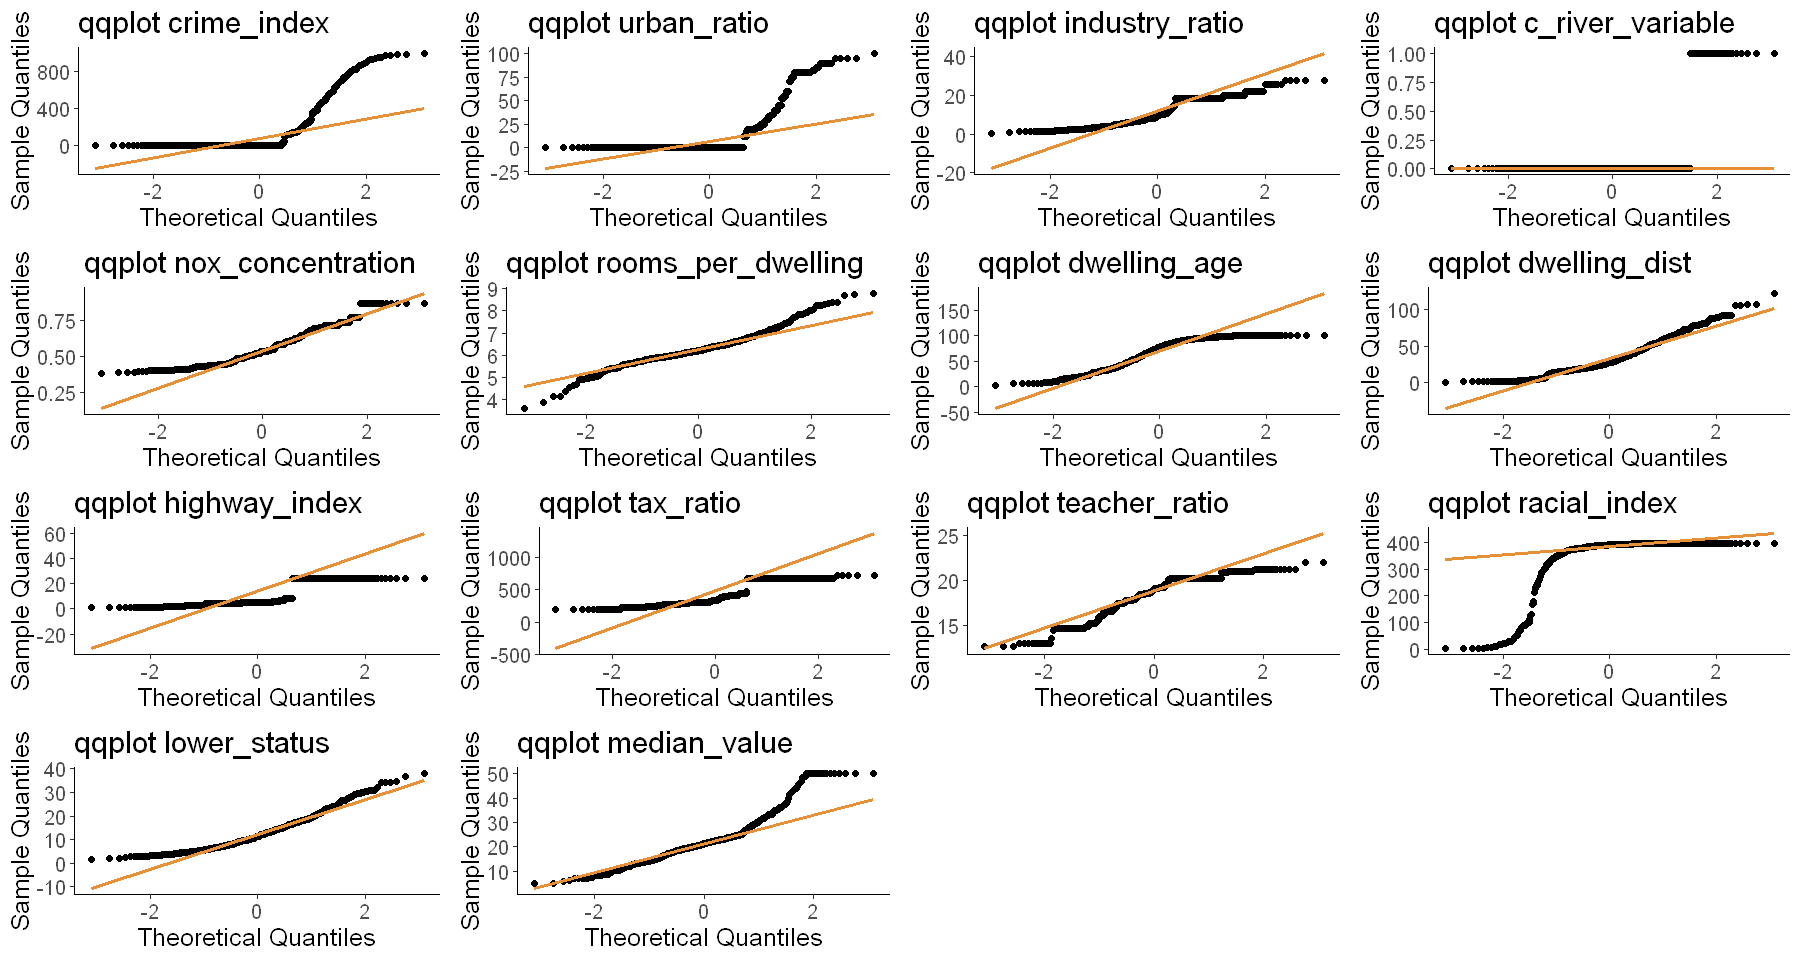

In [11]:
options(
  repr.plot.width = 15,  
  repr.plot.height = 8  
)
qq_plots = list()
var_data = colnames(data_bos)

for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data_bos[!is.na(data_bos[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#e69138', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

Ningún supuesto parece cumplir normalidad aparentemente. 

In [12]:
#A continuación miramos las caracteristicas pero agrupadas por la columna Sex
var_data = colnames(data_bos)

for (variable in var_data){
    df <- data_bos %>% 
            group_by(c_river_variable) %>% 
            summarize (
                ds= sd(!!sym(variable), na.rm = TRUE),
                var = var(!!sym(variable), na.rm = TRUE),
                min = min(!!sym(variable), na.rm = TRUE),
                max = max(!!sym(variable), na.rm = TRUE),
                med = median(!!sym(variable), na.rm = TRUE),
                media = mean(!!sym(variable), na.rm = TRUE),
                Q1 = quantile(!!sym(variable), na.rm = TRUE, probs = c(0.25)),
                Q2 = quantile(!!sym(variable), na.rm = TRUE, probs = c(0.5)),
                Q3 = quantile(!!sym(variable), na.rm = TRUE, probs = c(0.75))
            )
    print(variable)
    print(df)
    
}

[1] "crime_index"
# A tibble: 2 × 10
  c_river_variable    ds    var     min   max   med media     Q1    Q2    Q3
             <int> <dbl>  <dbl>   <dbl> <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl>
1                0  246. 60414. 0.00632  997. 0.245  129. 0.0796 0.245  142.
2                1  256. 65566. 0.0150   898. 0.448  162. 0.125  0.448  258.
[1] "urban_ratio"
# A tibble: 2 × 10
  c_river_variable    ds   var   min   max   med media    Q1    Q2    Q3
             <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1                0  23.6  558.     0   100     0 11.6      0     0  12.5
2                1  18.8  353.     0    90     0  7.71     0     0   0  
[1] "industry_ratio"
# A tibble: 2 × 10
  c_river_variable    ds   var   min   max   med media    Q1    Q2    Q3
             <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1                0  6.91  47.8  0.46  27.7  8.56  11.0  5.04  8.56  18.1
2                1  5.96  35.5  1.21  19.6 13.9   12.7  6.41 13.9  

Verificamos una de nuestras principales variables sospechosas "c_river_variable", y vemos como en función de si hay un rió colindante o no, el resto de variables varian. Por lo tanto, parece tener un impacto. 

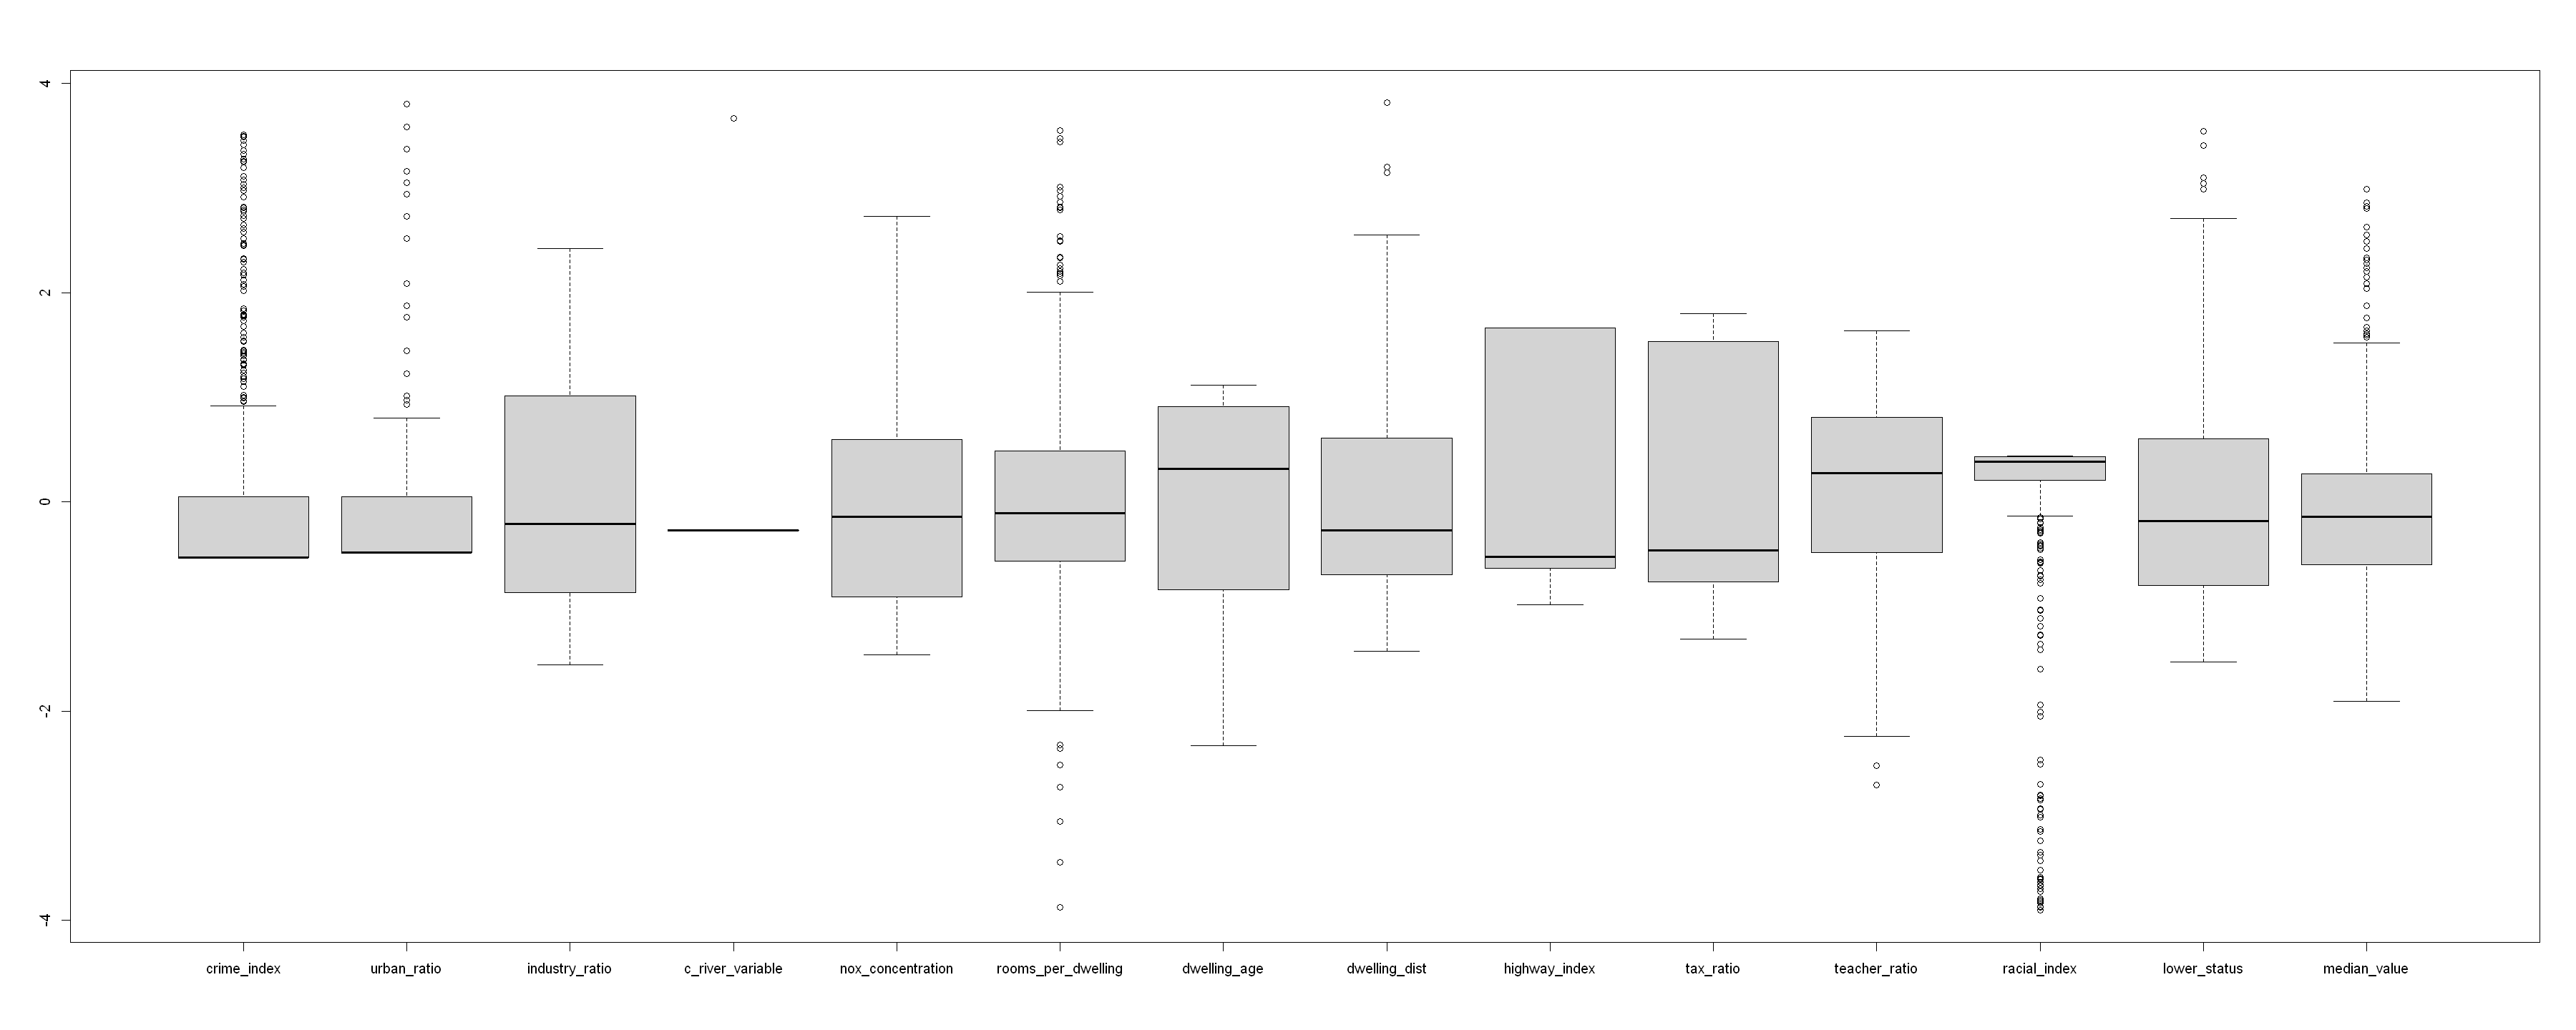

In [13]:
df_standard  <- as.data.frame(lapply(data_bos, scale))
options(
  repr.plot.width = 30,  
  repr.plot.height = 12  
)
boxplot(df_standard)

Vemos como tenemos muchos outliers fuera de los bigotes debido a que hay valores muy extremos en nuestro dataset tal y como se ha visto anteriormente. Además, se han estandarizado las muestras para que las magnitudes no afecten en la visualización. Vemos concentraciones de valores muy extremas.

## Análisis de correlación y de componentes principales

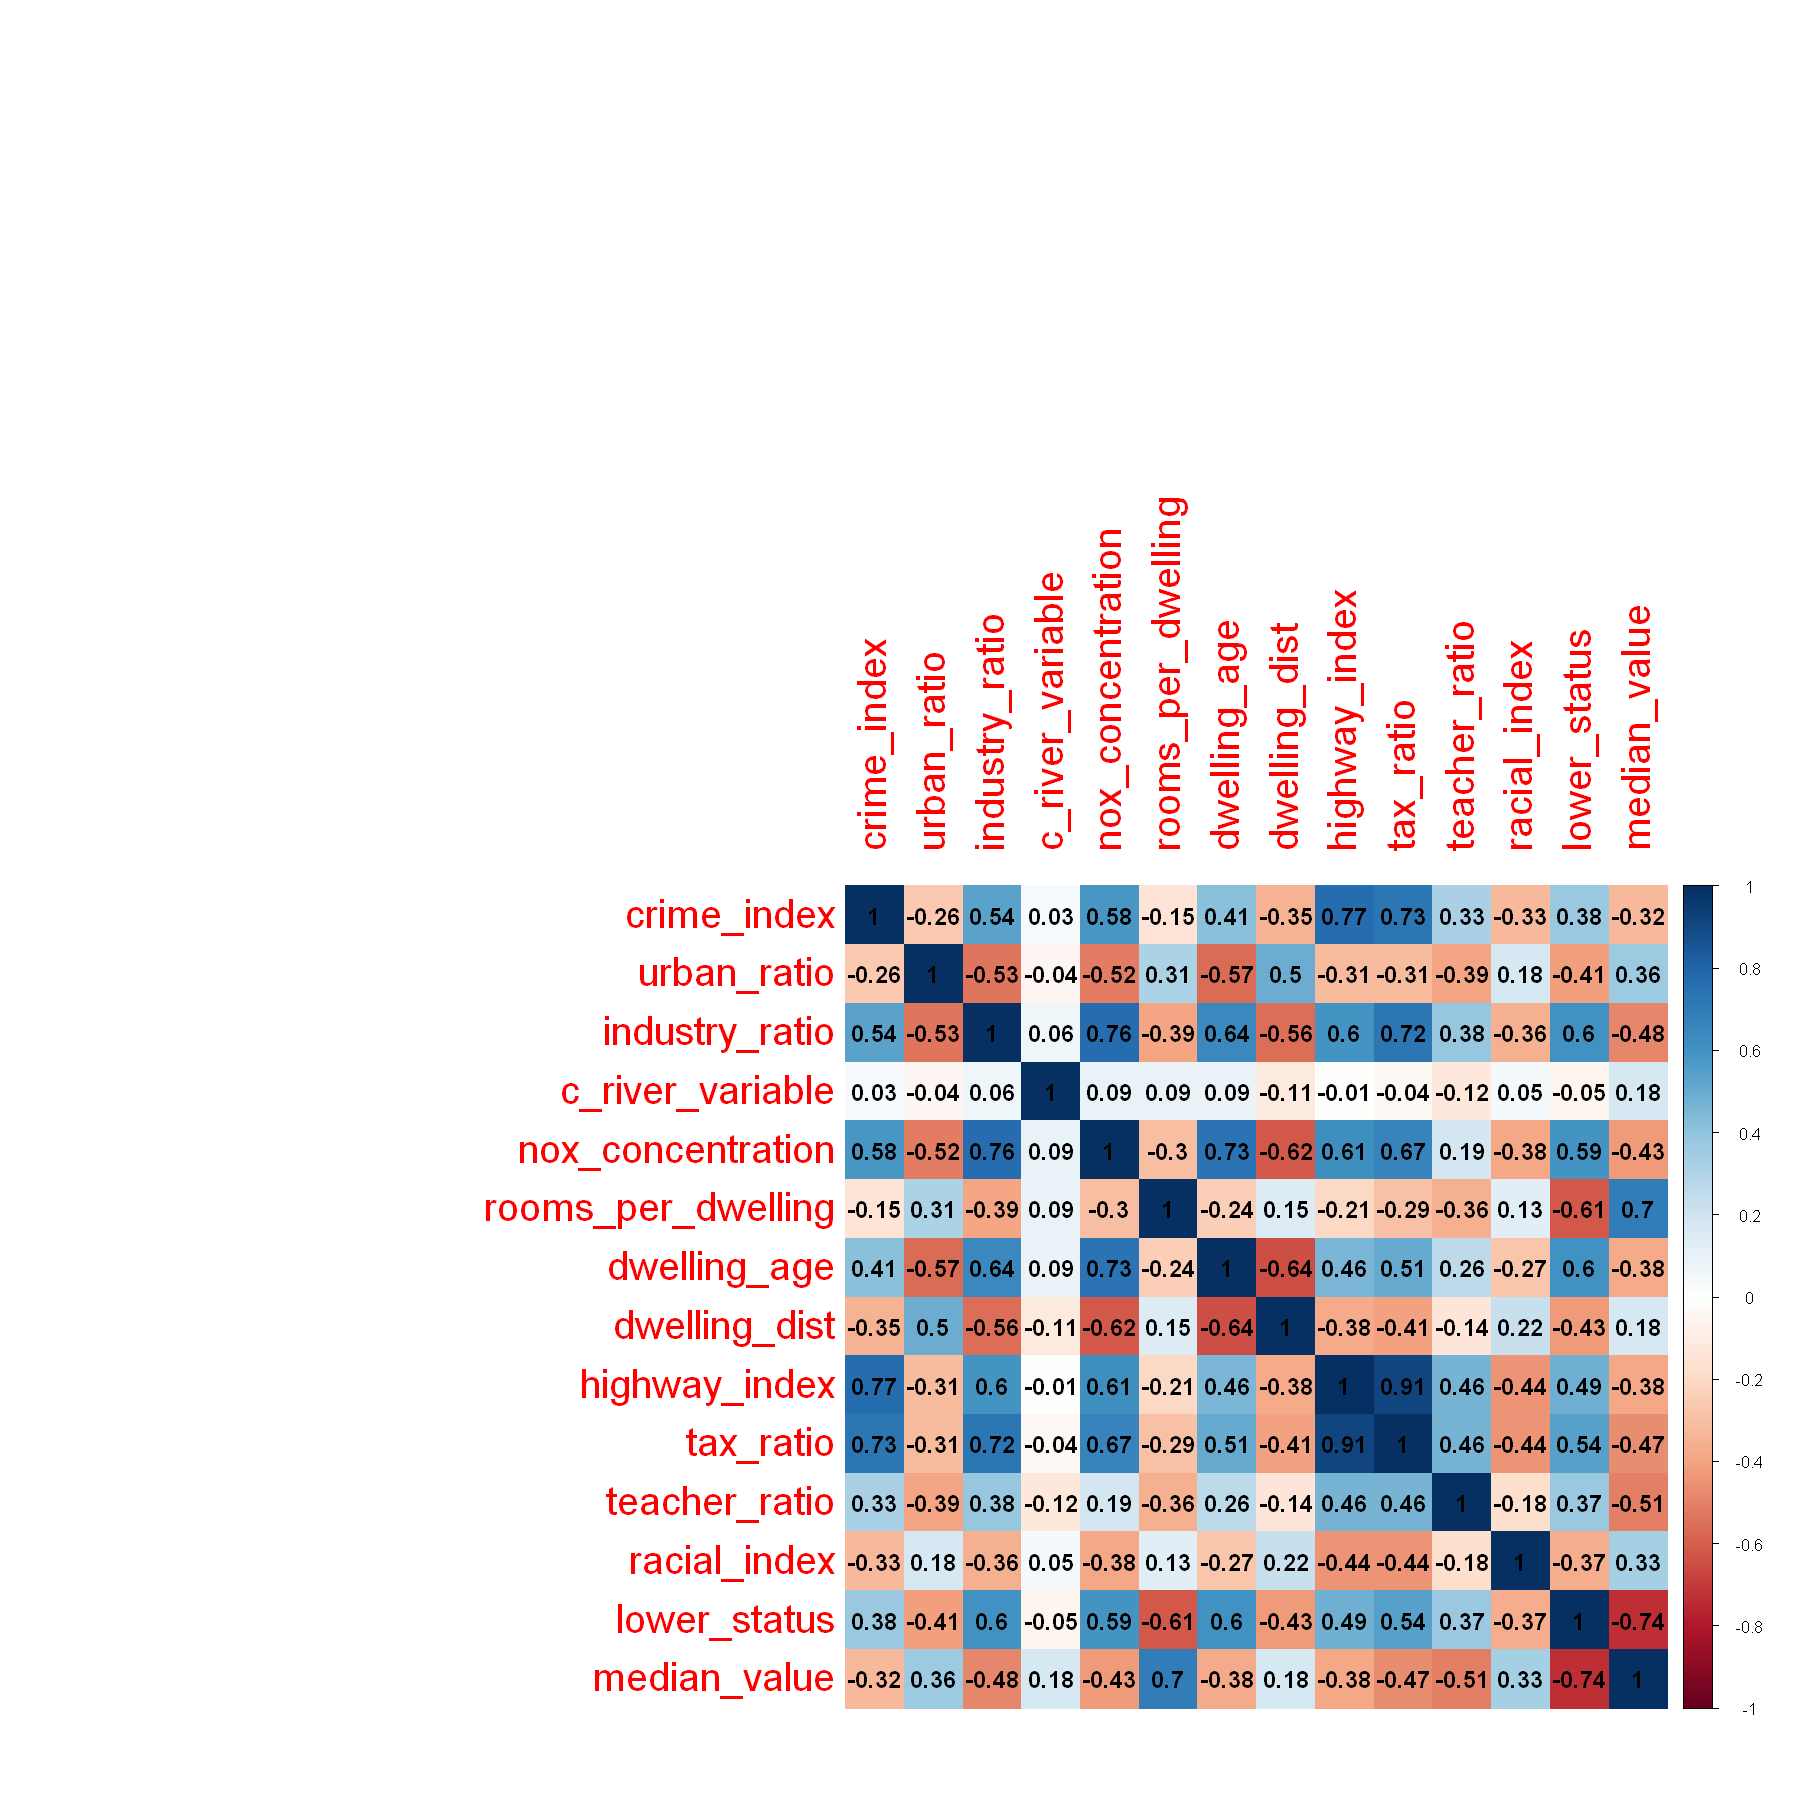

In [14]:
options(repr.plot.width=15, repr.plot.height=15)
corrplot(cor(data_bos), method = "color",addCoef.col = "black", tl.cex = 2, number.cex = 1.2)

Se aprecia como industry_ratio, crime_index, nox_concentrationm, y dwellin_age son de las que más correlación tienen con respecto a las demás variables. Y vemos como con respecto a nuestra variable objetivo (median_value), lower_Status y nox_concentration son las que más correlación tienen.  

In [15]:
#Debido a que tenemos muchas variables realizamos una pca para ver cuales aportan más información
round(cor(data_bos),2)
acp = princomp(data_bos,cor=TRUE) #función que llama al pca
summary(acp)
print('desviación estandard componente1:')
sd(predict(acp)[,1:1])
print('varianza componente1:')
var(predict(acp)[,1:1])

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
crime_index,1.00,-0.26,0.54,0.03,0.58,-0.15,0.41,-0.35,0.77,0.73,0.33,-0.33,0.38,-0.32
urban_ratio,-0.26,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.50,-0.31,-0.31,-0.39,0.18,-0.41,0.36
industry_ratio,0.54,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.56,0.60,0.72,0.38,-0.36,0.60,-0.48
c_river_variable,0.03,-0.04,0.06,1.00,0.09,0.09,0.09,-0.11,-0.01,-0.04,-0.12,0.05,-0.05,0.18
nox_concentration,0.58,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.62,0.61,0.67,0.19,-0.38,0.59,-0.43
rooms_per_dwelling,-0.15,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.15,-0.21,-0.29,-0.36,0.13,-0.61,0.70
dwelling_age,0.41,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.64,0.46,0.51,0.26,-0.27,0.60,-0.38
dwelling_dist,-0.35,0.50,-0.56,-0.11,-0.62,0.15,-0.64,1.00,-0.38,-0.41,-0.14,0.22,-0.43,0.18
highway_index,0.77,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.38,1.00,0.91,0.46,-0.44,0.49,-0.38
tax_ratio,0.73,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.41,0.91,1.00,0.46,-0.44,0.54,-0.47


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.5379733 1.2947589 1.1780506 0.93882896 0.92959813
Proportion of Variance 0.4600935 0.1197429 0.0991288 0.06295713 0.06172519
Cumulative Proportion  0.4600935 0.5798364 0.6789652 0.74192230 0.80364749
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.82762622 0.65235655 0.61812160 0.59155526 0.51385424
Proportion of Variance 0.04892608 0.03039779 0.02729102 0.02499554 0.01886044
Cumulative Proportion  0.85257358 0.88297137 0.91026239 0.93525793 0.95411838
                          Comp.11    Comp.12    Comp.13     Comp.14
Standard deviation     0.47936245 0.44107531 0.39777683 0.244500604
Proportion of Variance 0.01641345 0.01389625 0.01130189 0.004270039
Cumulative Proportion  0.97053183 0.98442807 0.99572996 1.000000000

[1] "desviación estandard componente1:"


[1] 2.540485

[1] "varianza componente1:"


[1] 6.454064

Vemos que con la componente 1 y la componente 2 ya seriamos capaces de explicar casi un 60% de la variación. Necesitariamos la 3 para poder explicar casi un 70%. 

In [16]:
#A través de esta función tendriamos las puntuaciones en las componentes principales
#Nos es útil para comparar  como para usar estas componentes sustituyendolas por las variables originales
predict(acp)
#acp$scores #otra forma de llamarlos

Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,Comp.6,Comp.7,Comp.8,Comp.9,Comp.10,Comp.11,Comp.12,Comp.13,Comp.14
-1.79191122,0.82314773,-0.9822570,-1.092793335,1.625485e-01,0.4502740,-0.28875233,-0.64971631,0.90667145,0.230701090,-0.01468350,-0.96863383,0.504422276,0.2470604159
-1.44389887,-0.49049970,-0.8271457,-0.115927612,4.683338e-01,-0.2921849,0.36467407,0.75684867,0.27649951,0.048709252,0.20194690,0.06469589,0.497856393,-0.1073449392
-2.44360792,0.75905321,-0.1953096,-0.110127326,1.112057e+00,-0.6608803,0.56995637,0.42636509,-0.07063883,-0.009723177,0.09619618,0.30284889,-0.013833445,0.0263366671
-2.86950884,0.13704532,0.2050237,0.304652884,1.101156e+00,-0.8714370,0.71030623,0.39399123,0.31339949,-0.172145500,0.18952191,-0.03471959,-0.322497708,0.0515577497
-2.80530286,0.36079059,0.1198802,0.212325257,1.173285e+00,-0.8553113,0.49402828,0.66506084,0.29047312,-0.346168967,0.22266153,0.26127747,-0.469039050,0.1093430210
-2.33472657,-0.48766538,-0.1872207,0.305885500,7.607435e-01,-0.6527286,0.64071834,0.46913096,0.47074360,-0.241236231,0.55401440,-0.06381444,-0.081872964,-0.0008826266
-1.35528475,-0.43684350,-0.5697497,-0.596701912,-5.955216e-01,0.6841913,0.81790630,0.46020719,0.11771013,-0.506727836,0.07958564,0.10138599,0.267816688,-0.0837711432
-0.96287857,-0.18797879,-0.9058994,-0.830746538,-5.922952e-01,0.7717758,0.30067650,1.35377664,0.08896115,-0.959054043,0.35800704,0.80024580,0.073096881,0.0225374976
0.01672316,-1.44924545,-1.3766637,-0.959980762,-1.415359e+00,1.0380240,-0.04692988,1.69676509,0.48236652,-1.105071451,-0.11793316,1.04609544,0.002451742,0.0249900031
-0.92089382,-0.80747371,-0.7359531,-0.715832596,-8.789651e-01,0.7005311,0.64478890,1.32492635,0.13616572,-0.646776200,0.11418089,0.29947177,0.390691742,-0.0958243104


In [17]:
loadings(acp)


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
crime_index         0.274  0.188  0.376  0.152         0.240  0.209       
urban_ratio        -0.242         0.382 -0.105 -0.397  0.368 -0.557       
industry_ratio      0.335                                     0.194 -0.145
c_river_variable           0.379 -0.226  0.655 -0.565 -0.214              
nox_concentration   0.330  0.218 -0.112 -0.148         0.178  0.242  0.133
rooms_per_dwelling -0.201  0.493  0.223 -0.121  0.264 -0.213 -0.193  0.433
dwelling_age        0.298  0.189 -0.294 -0.132  0.105        -0.255  0.544
dwelling_dist      -0.244 -0.312  0.314  0.189 -0.168         0.459  0.595
highway_index       0.312  0.123  0.410  0.124                            
tax_ratio           0.332         0.345                0.136        -0.102
teacher_ratio       0.210 -0.308  0.153  0.456  0.411 -0.383 -0.361       
racial_index       -0.196        -0.263  0.454  0.378  0.704              
lower_status  

Los valores absolutos más altos indican mayor contribución en la componente. Una carga positiva implica una relación positiva y viceversa.Las cargas cercanas a 0 implican un impacto muy bajo en la componente. Se puede observar como en la primera componente casi todas las variables tienen un peso muy similar en magnitud. Solo hay 5 variables por encima del 0.3 y estas son: industry_ratio, nox_concentration, highway_index, tax_ratio, lower_status. Algunas ya se han comentado en analísis posteriores. 

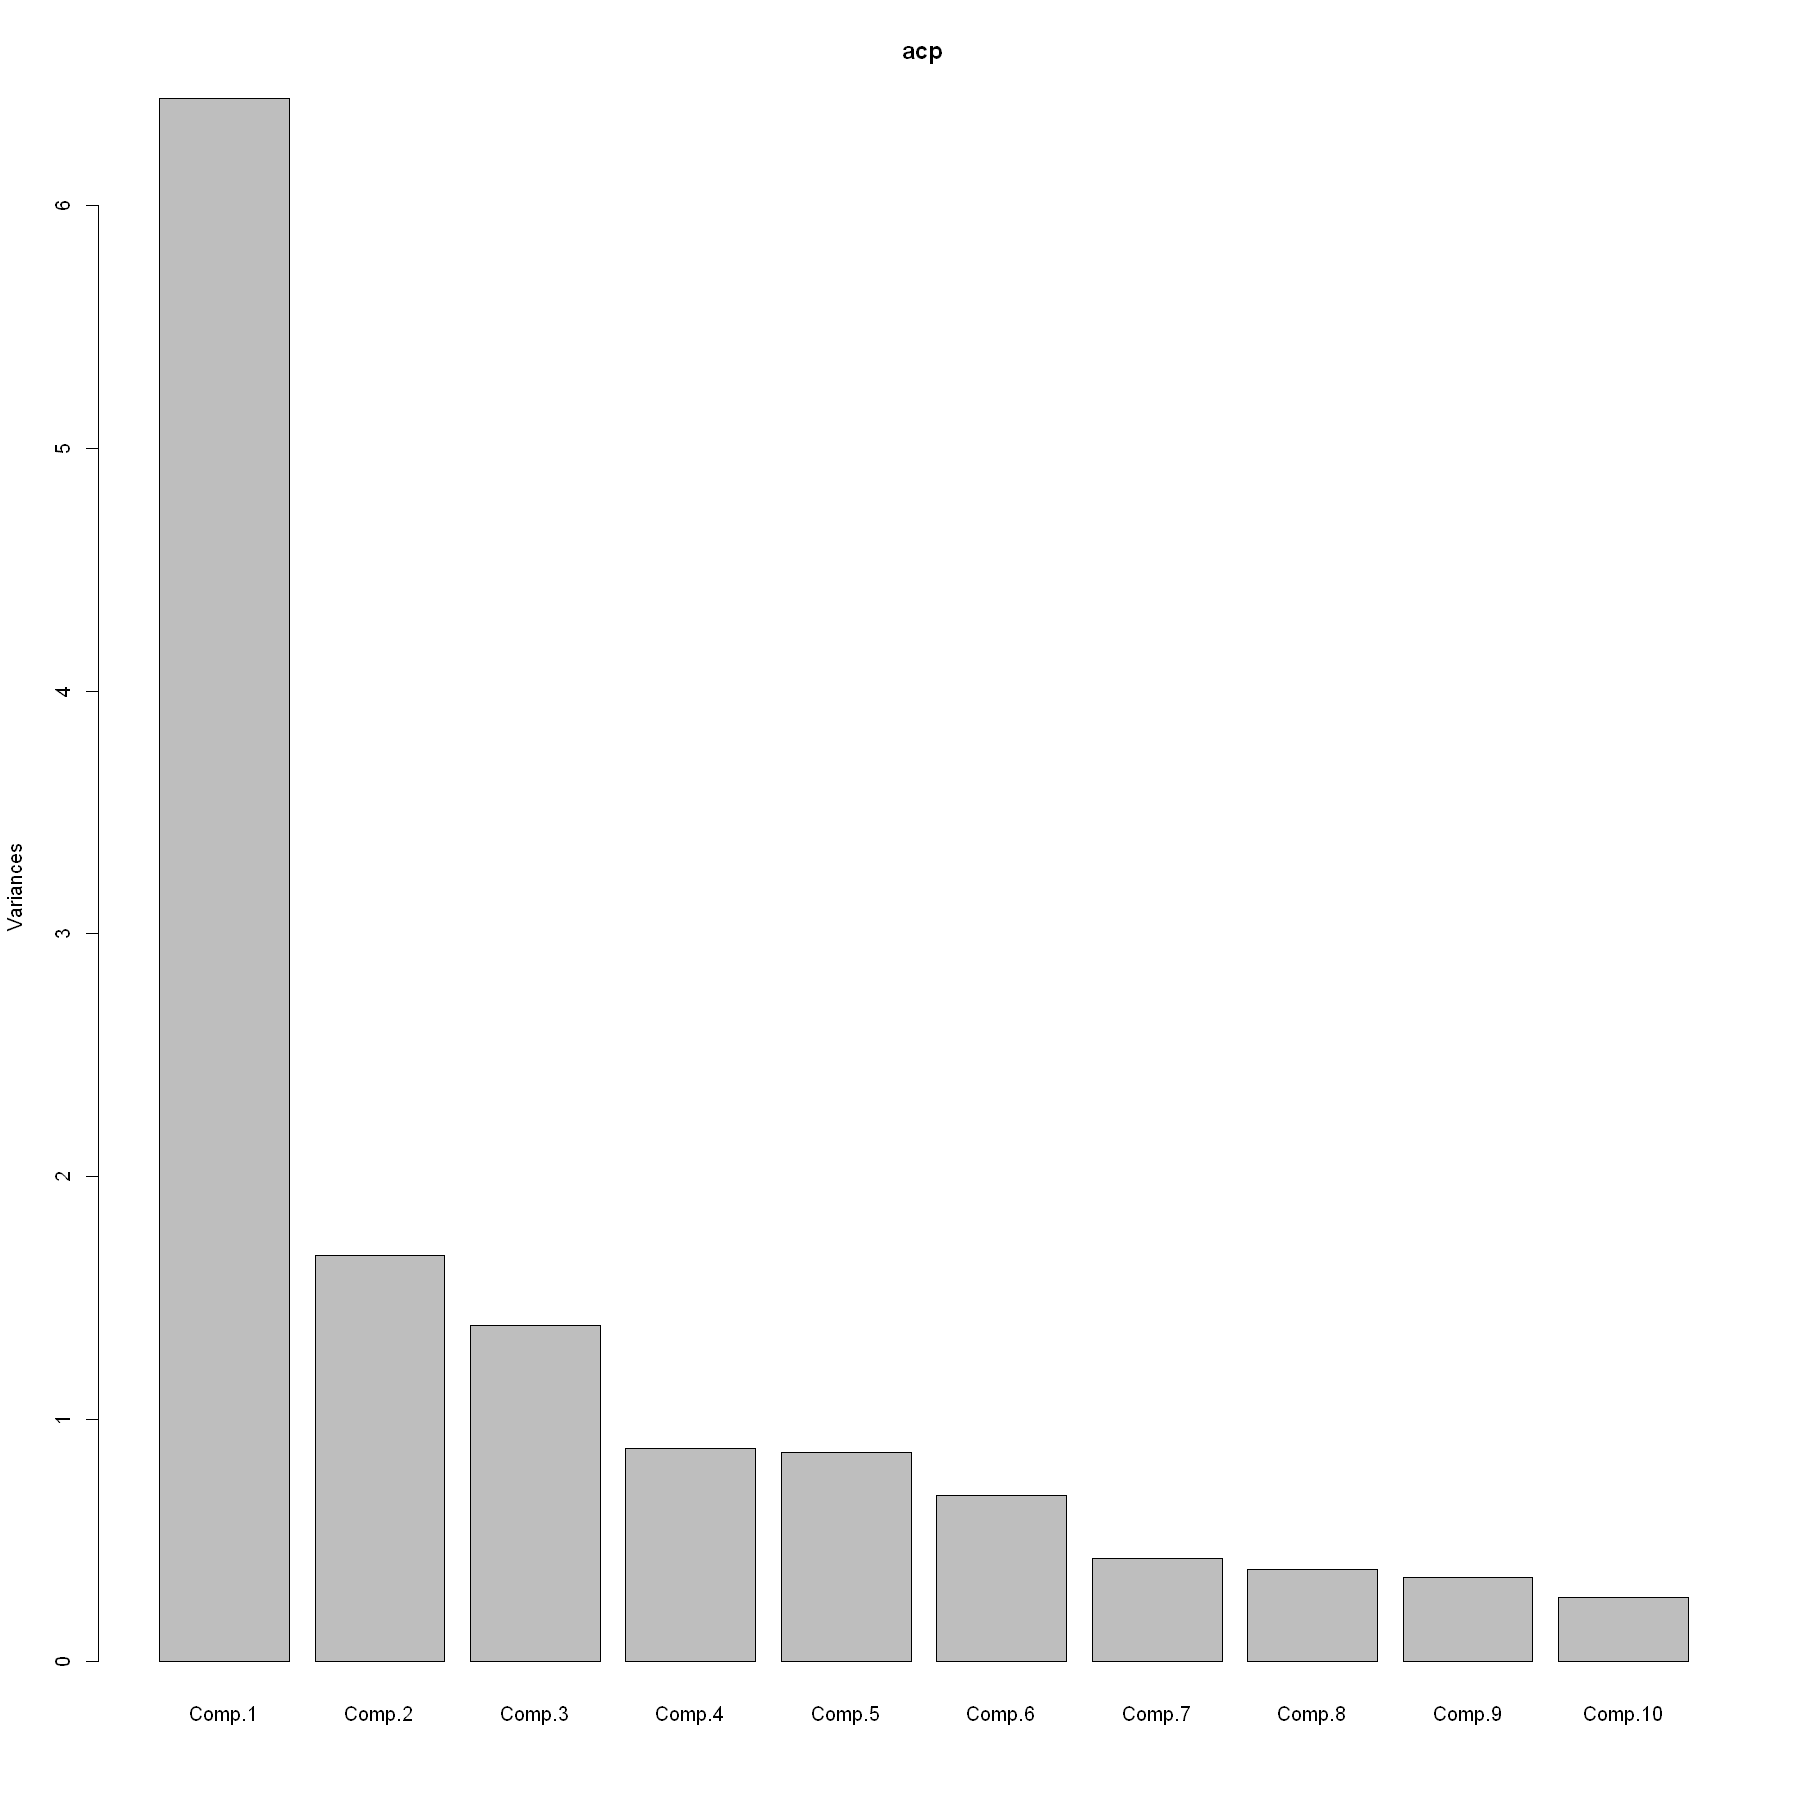

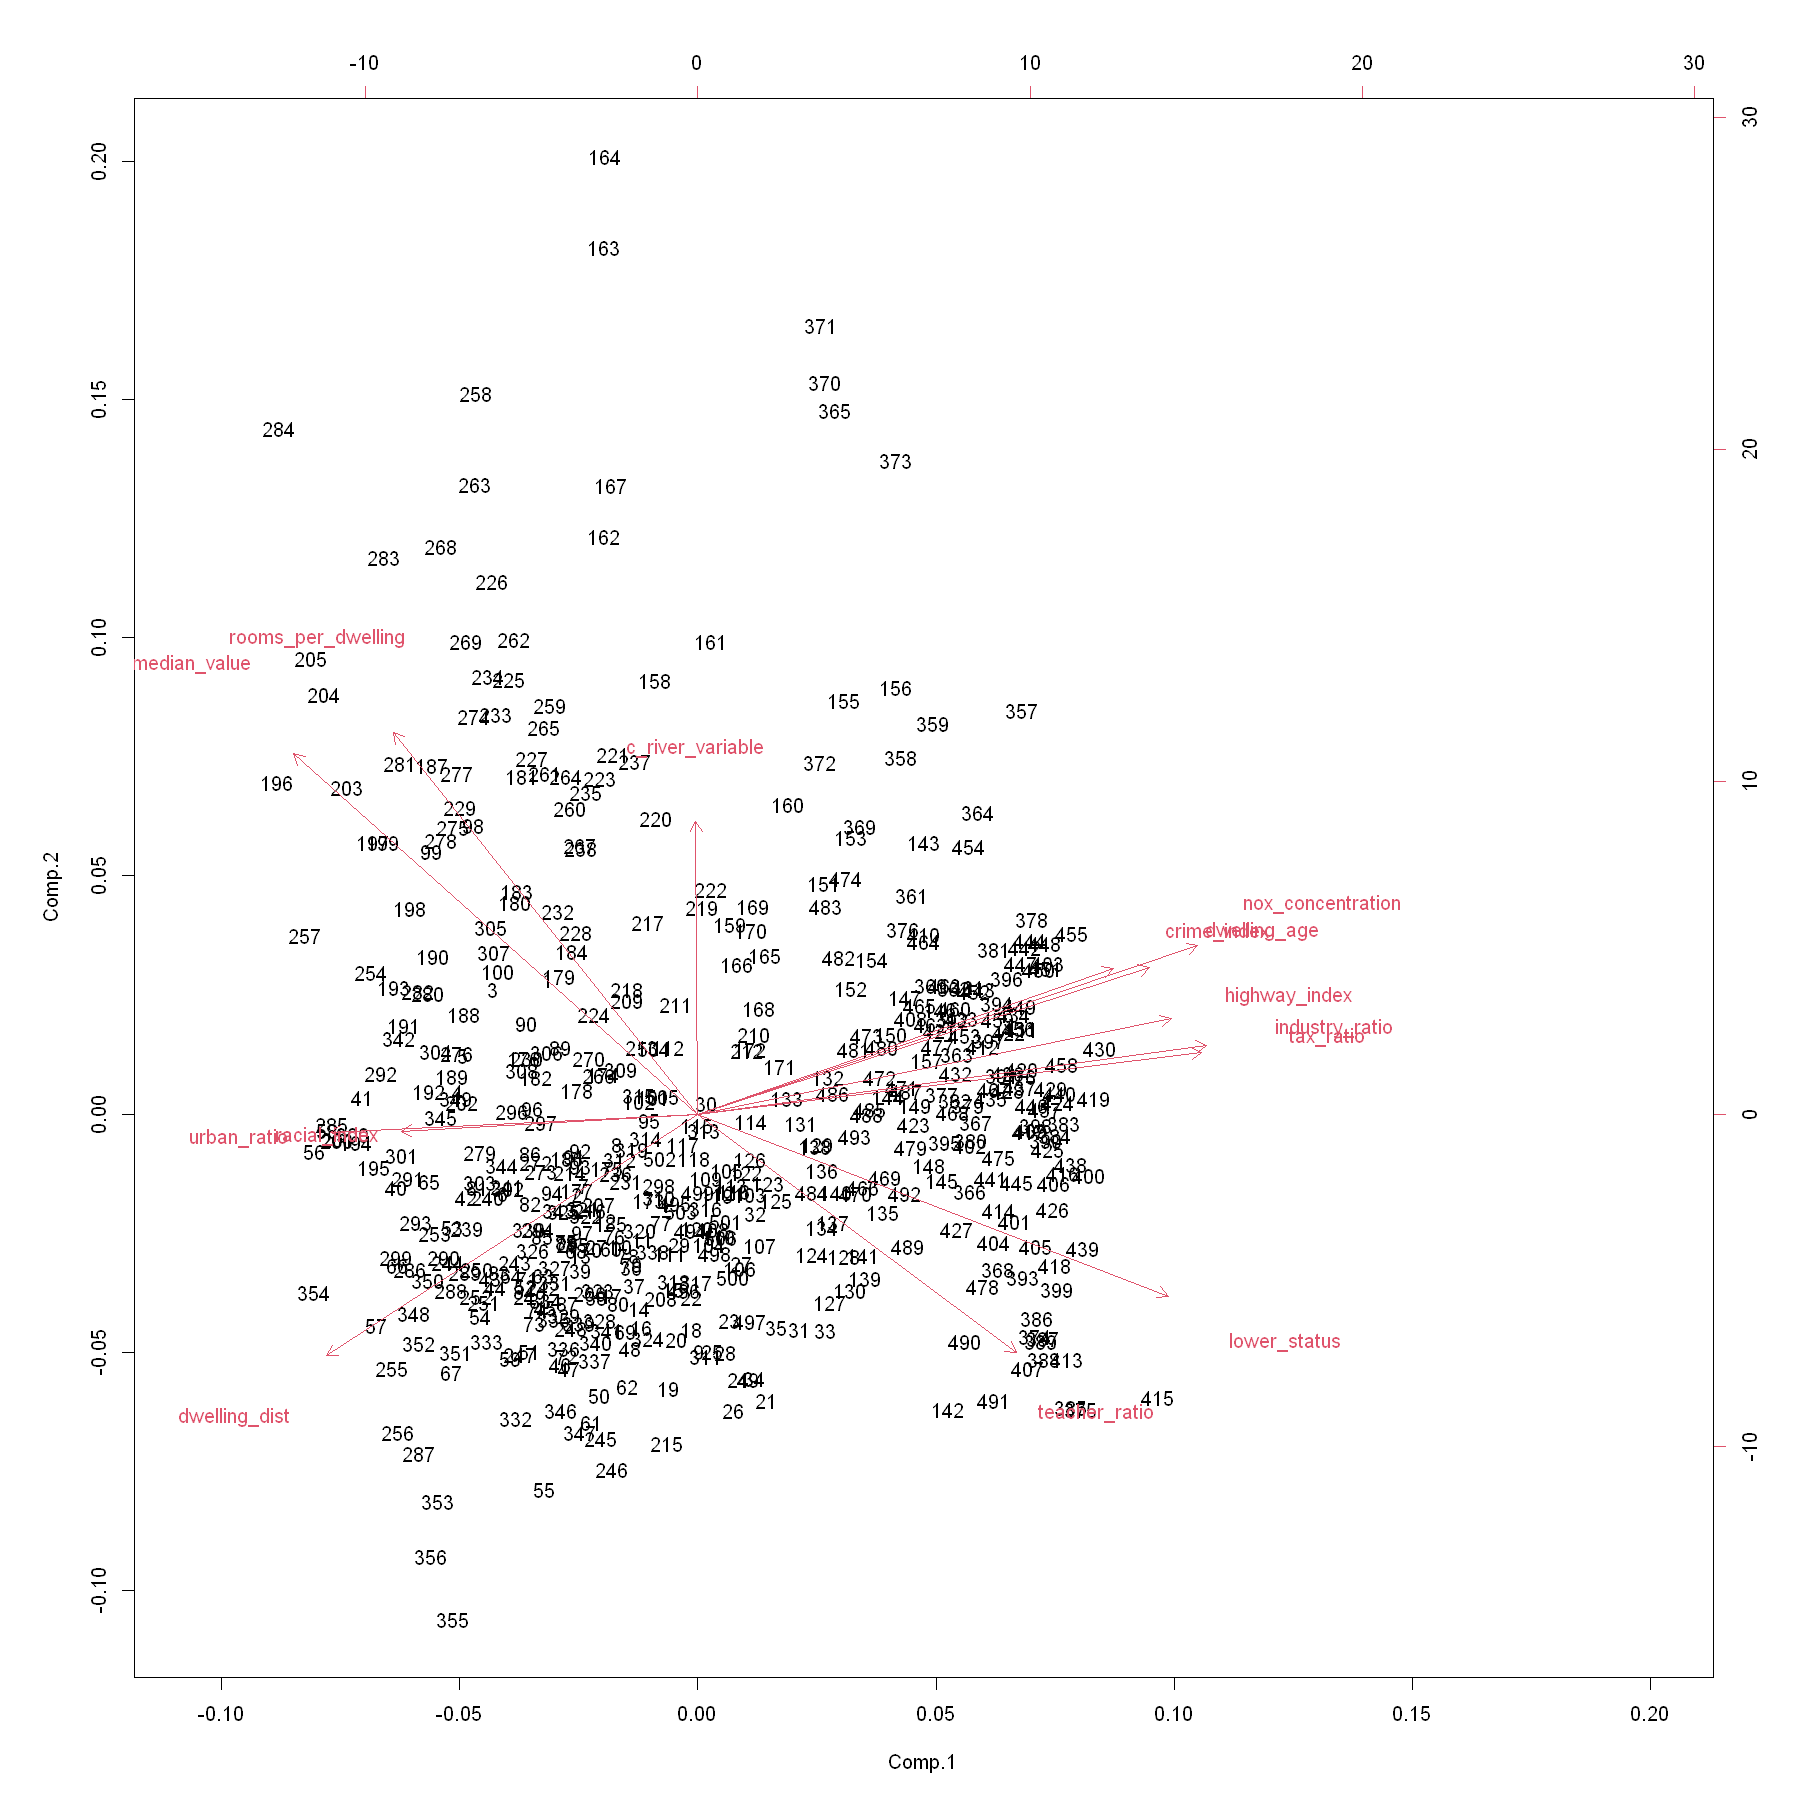

In [18]:
plot(acp)
biplot(acp)

Vemos con en el primer plot, la componente 1 es muy relevante, pero esto da menos información de la que nos gustaría ya que no vemos una variable o dos que puedan explicar bien los datos. Por lo tanto pasaremos a realizar los test de ANOVA. 

## Análisis de ANOVA

Debido a la naturalez de nuestras variables realizaremos la anova con las varaibles c_river_variable ya que es una variable entera pero categorica. Nos fijaremos especialmente en nuestras variables que mayor correlación han tenido con nuestra variable objetivo. (lower_status y rooms_per_dwelling)

### Comprobación de supuestos

In [19]:
head(data_bos)

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


In [20]:
variables = c('crime_index', 'urban_ratio', 'industry_ratio', 'nox_concentration', 'rooms_per_dwelling', 'dwelling_age','dwelling_dist','highway_index','tax_ratio','teacher_ratio','racial_index','lower_status','median_value')
categorias = c(0,1)
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data_bos, c_river_variable == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

              Variable Cat   Shapiro PValor
W          crime_index   0 0.5970073  0.000
W1         crime_index   1 0.6963937  0.000
W2         urban_ratio   0 0.5609153  0.000
W3         urban_ratio   1 0.4798219  0.000
W4      industry_ratio   0 0.8974442  0.000
W5      industry_ratio   1 0.8589682  0.000
W6   nox_concentration   0 0.9385549  0.000
W7   nox_concentration   1 0.8714961  0.001
W8  rooms_per_dwelling   0 0.9621043  0.000
W9  rooms_per_dwelling   1 0.9481502  0.099
W10       dwelling_age   0 0.8946101  0.000
W11       dwelling_age   1 0.8424522  0.000
W12      dwelling_dist   0 0.9341595  0.000
W13      dwelling_dist   1 0.9562894  0.177
W14      highway_index   0 0.6801004  0.000
W15      highway_index   1 0.6649161  0.000
W16          tax_ratio   0 0.8168932  0.000
W17          tax_ratio   1 0.7809569  0.000
W18      teacher_ratio   0 0.8985897  0.000
W19      teacher_ratio   1 0.8975781  0.003
W20       racial_index   0 0.4817410  0.000
W21       racial_index   1 0.428

Rechamos hipotesis nula para todos los casos excepto para rooms_per_dwelling con '1', dwelling_dist con '1', y lower status con '1'. Por lo tanto, si la zona colinda con un rio estas variables se comportan de forma normal. A continuación comprobaremos homocedasticidad, aunque viendo las graficas que se han visto, se puede deducir con antelación que por lo general no se cumplirá homocedasticidad en las variables.


In [21]:
variables = c('crime_index', 'urban_ratio', 'industry_ratio', 'nox_concentration', 'rooms_per_dwelling', 'dwelling_age','dwelling_dist','highway_index','tax_ratio','teacher_ratio','racial_index','lower_status','median_value')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ c_river_variable, data = data_bos)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                                 Variable Estadistico       PValor
Bartlett's K-squared          crime_index  0.10764547 0.7428408254
Bartlett's K-squared1         urban_ratio  2.87243440 0.0901084767
Bartlett's K-squared2      industry_ratio  1.27819138 0.2582355879
Bartlett's K-squared3   nox_concentration  4.41180656 0.0356910244
Bartlett's K-squared4  rooms_per_dwelling  4.35444241 0.0369125410
Bartlett's K-squared5        dwelling_age  3.57308477 0.0587231282
Bartlett's K-squared6       dwelling_dist 10.55400183 0.0011593680
Bartlett's K-squared7       highway_index  0.20982417 0.6469052502
Bartlett's K-squared8           tax_ratio  0.03282348 0.8562321684
Bartlett's K-squared9       teacher_ratio  0.07546907 0.7835341731
Bartlett's K-squared10       racial_index 14.47853527 0.0001417658
Bartlett's K-squared11       lower_status  0.29302631 0.5882876935
Bartlett's K-squared12       median_value  6.31554125 0.0119684206


Efectivamente, rechazamos hipotesis nula en todas las variables excpecto en median_value, racial_index, dwelling_dist, rooms_per_dwelling i nox_concentration.

Así pues, si tenemos que coger escoger una variable para un modelo de regresión lineal seria rooms_per_dwelling y dwelling_dist ya que ambas cumplen homocedasticidad y las dos en una categoria presentan comportamiento normal. 
Lower_status sin embargo solo cumple normalidad para c_river_variable == 1. Visualizamos las 3 respecto nuestra variable objetivo.

In [29]:
variables = c('rooms_per_dwelling', 'dwelling_dist','lower_status','median_value', 'c_river_variable')

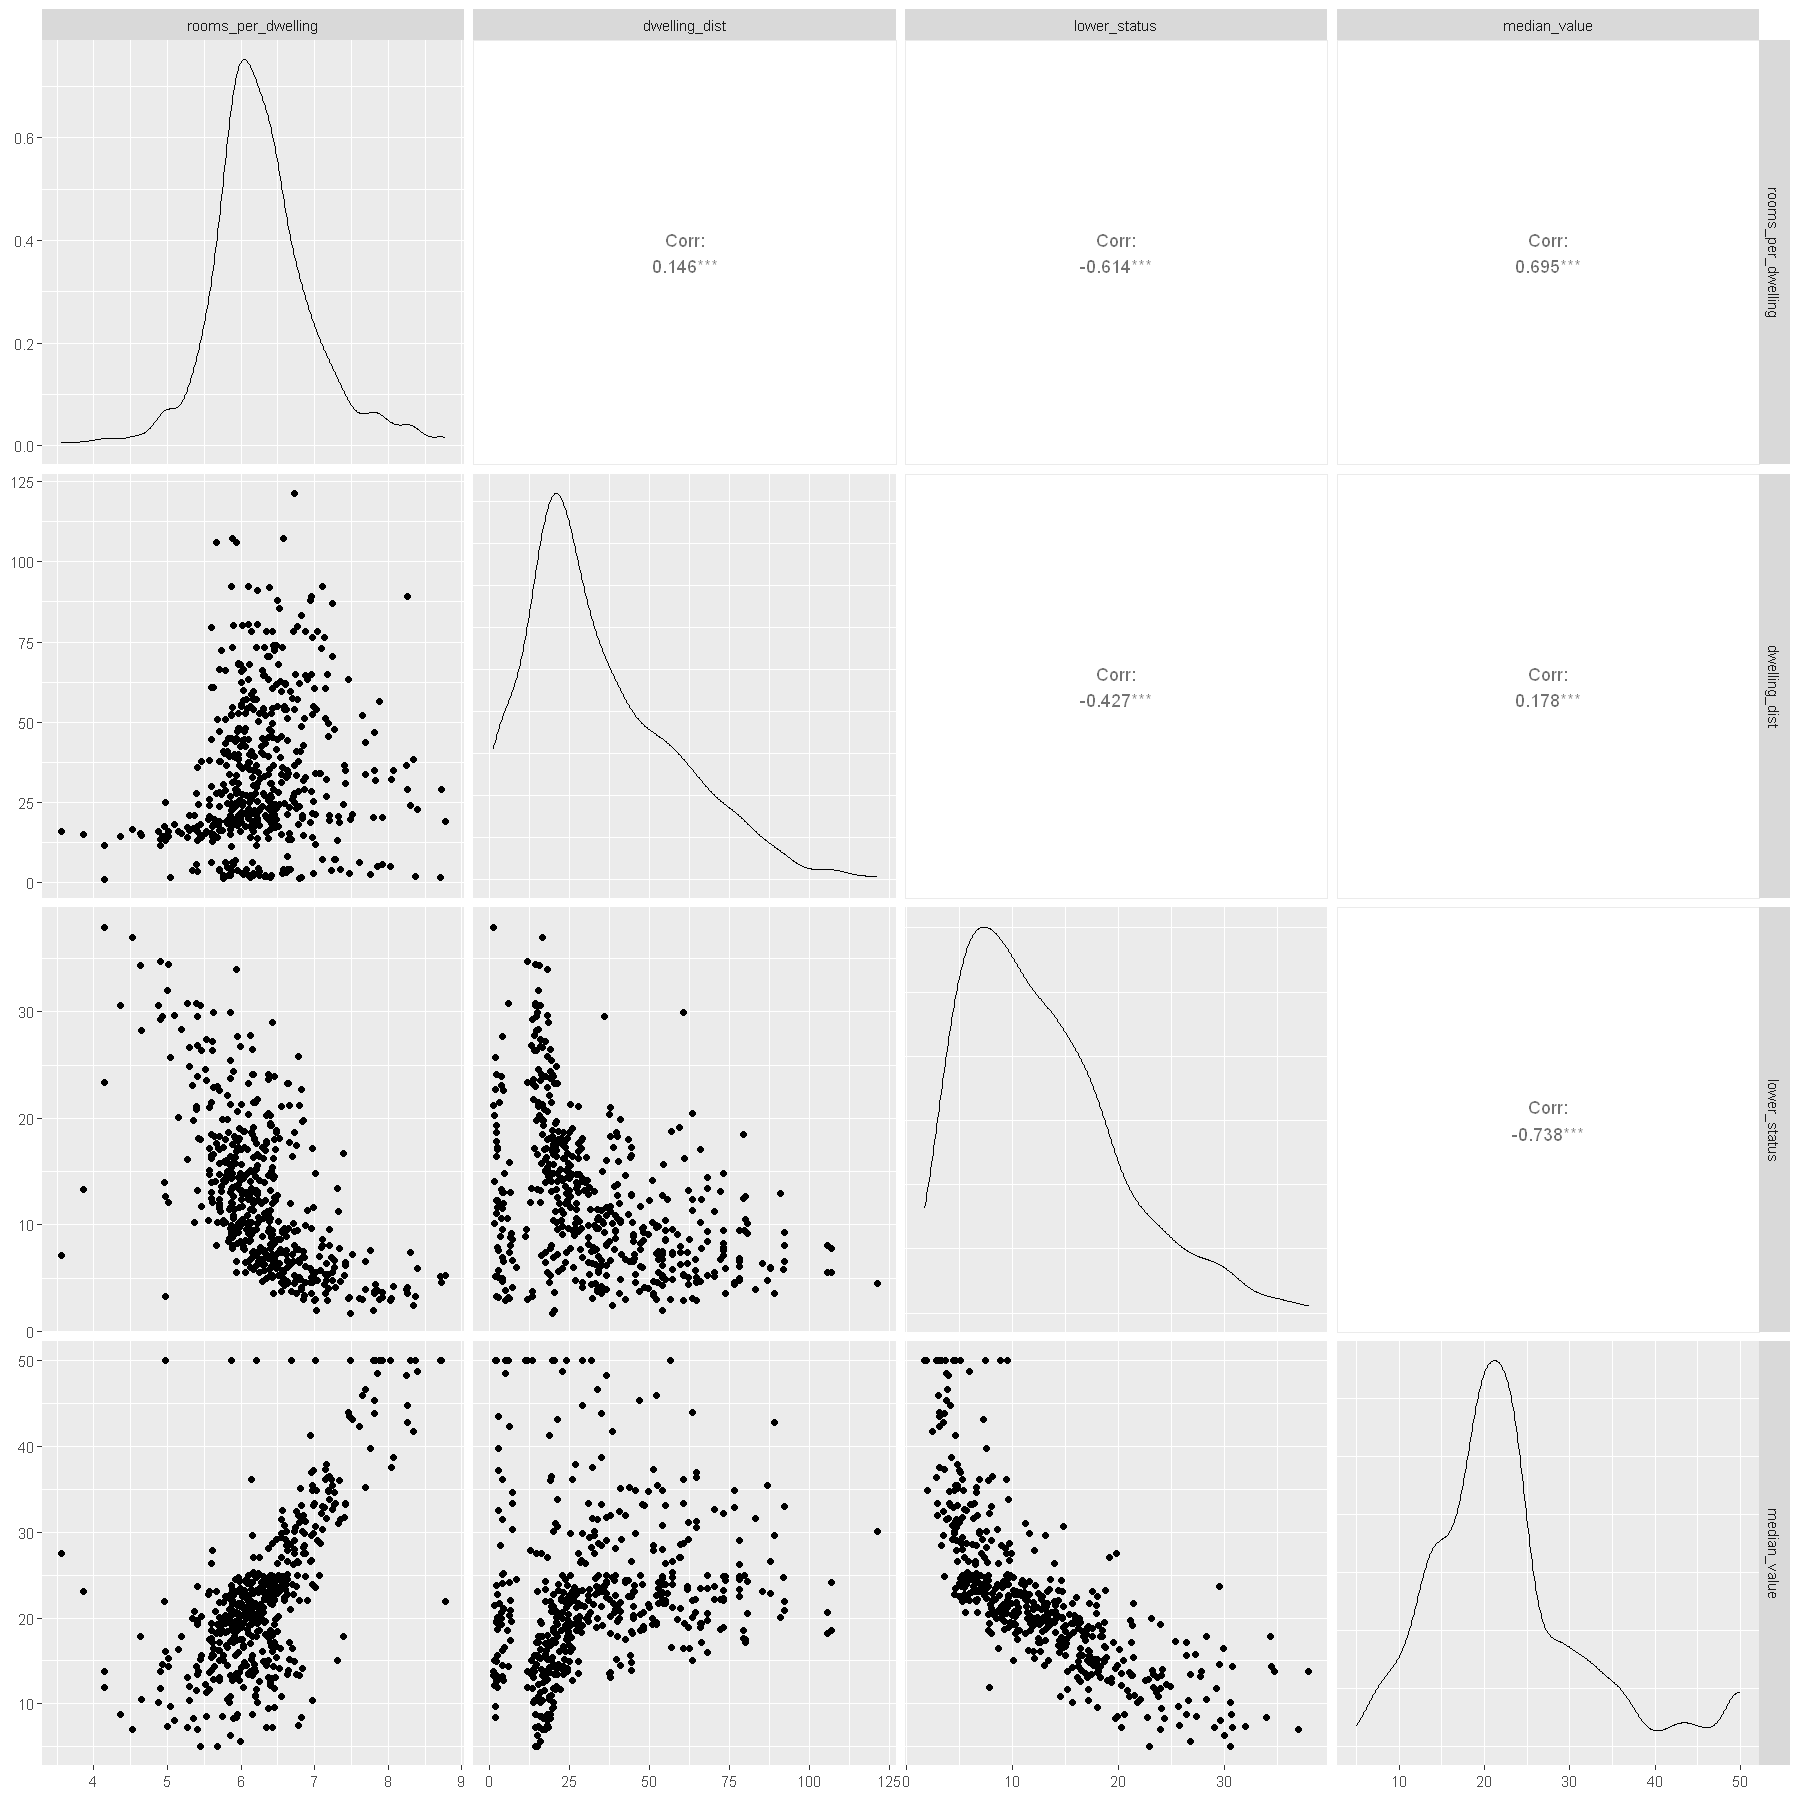

In [23]:
ggpairs(data_bos[variables])

Vemos como rooms_per_dwelling tiene una forma más recta que lower_status que tiene una forma más polinómica. Sin embargo, rooms_per_dwelling cumple los dos supuestos cuando la categoria de c_river_variable == 1, así pues vamos a ver el comportamiento cuando esto ocurre.

Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"
Warning message in cor(x, y):
"the standard deviation is zero"


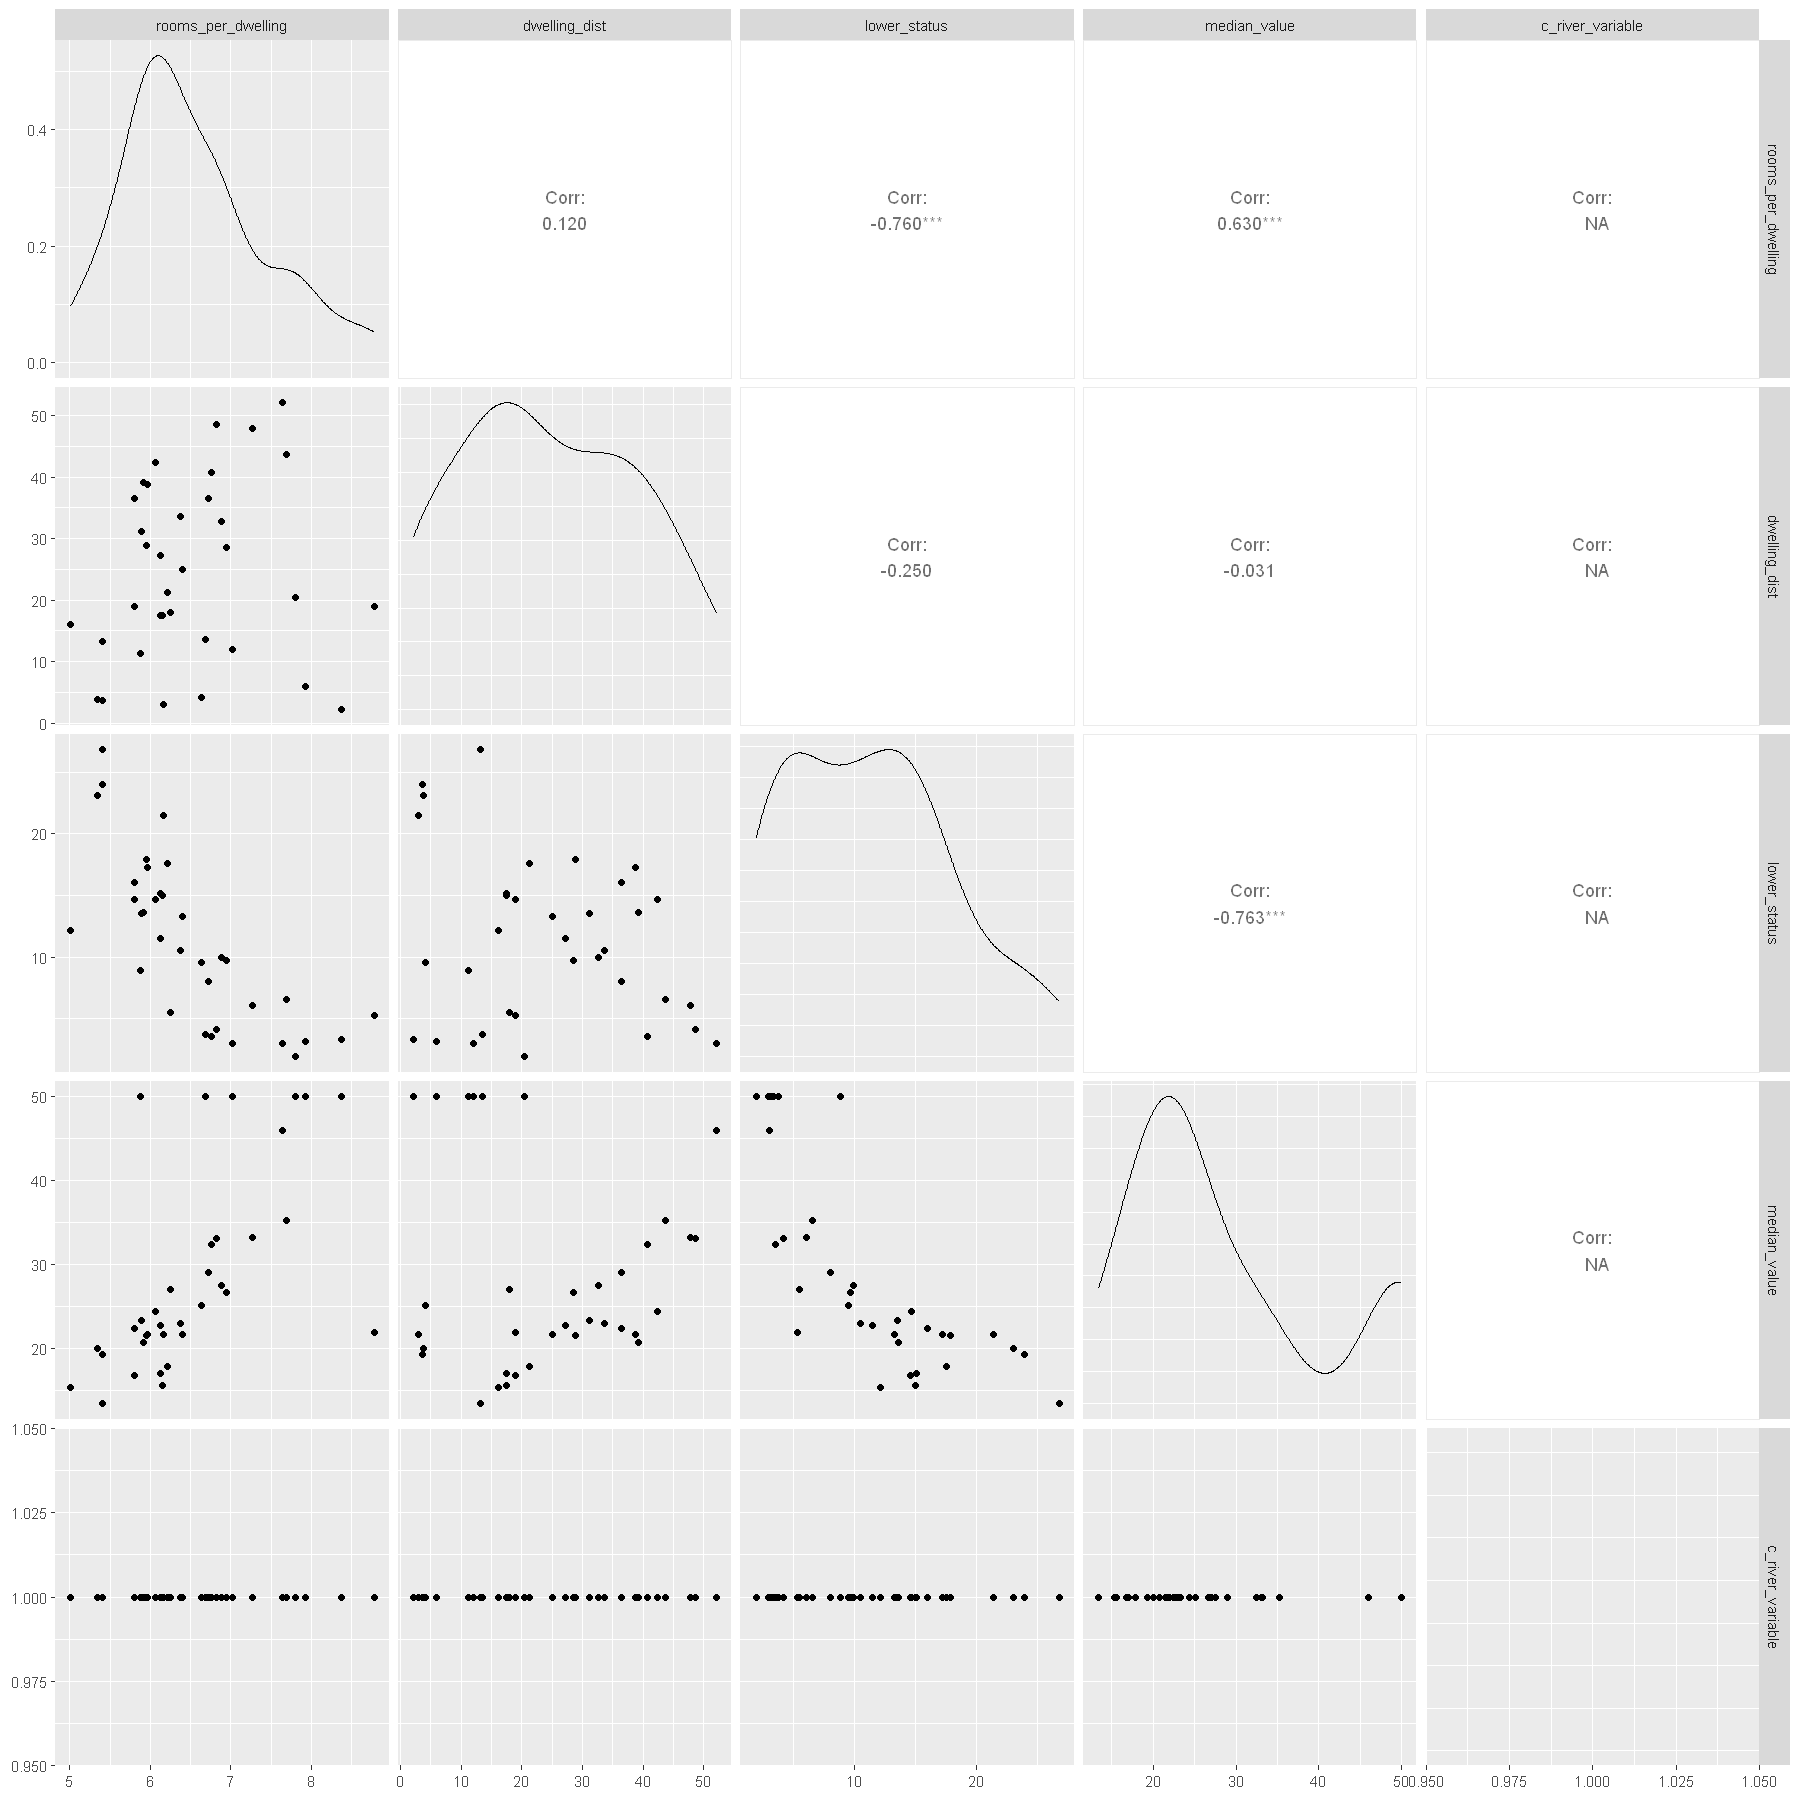

In [32]:
df_filtrado <- subset(data_bos[variables], c_river_variable == 1)
ggpairs(df_filtrado)

Vemos como quitando las muestras que se encuentran en la parte superior, si que podria seguir una linealidad. Sin embargo, ya se observa a simple vista que ninguna de las tres finales candidates para realizar una regresión lineal, se adaptarian a seguir una regresión lineal.

Finalmente, me decantaria por la variable rooms_per_dwelling, ya que es la que más supuestos cumple, y la que quizá se podría adaptar mejor a una regresión lineal. 

### ONE WAY ANOVA para c_river_variable

In [38]:
#pasamos a variable categorica nuestra variable c_river_variable

df_t = data_bos
df_t$c_river_variable <- as.character(df_t$c_river_variable)
head(df_t)


,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


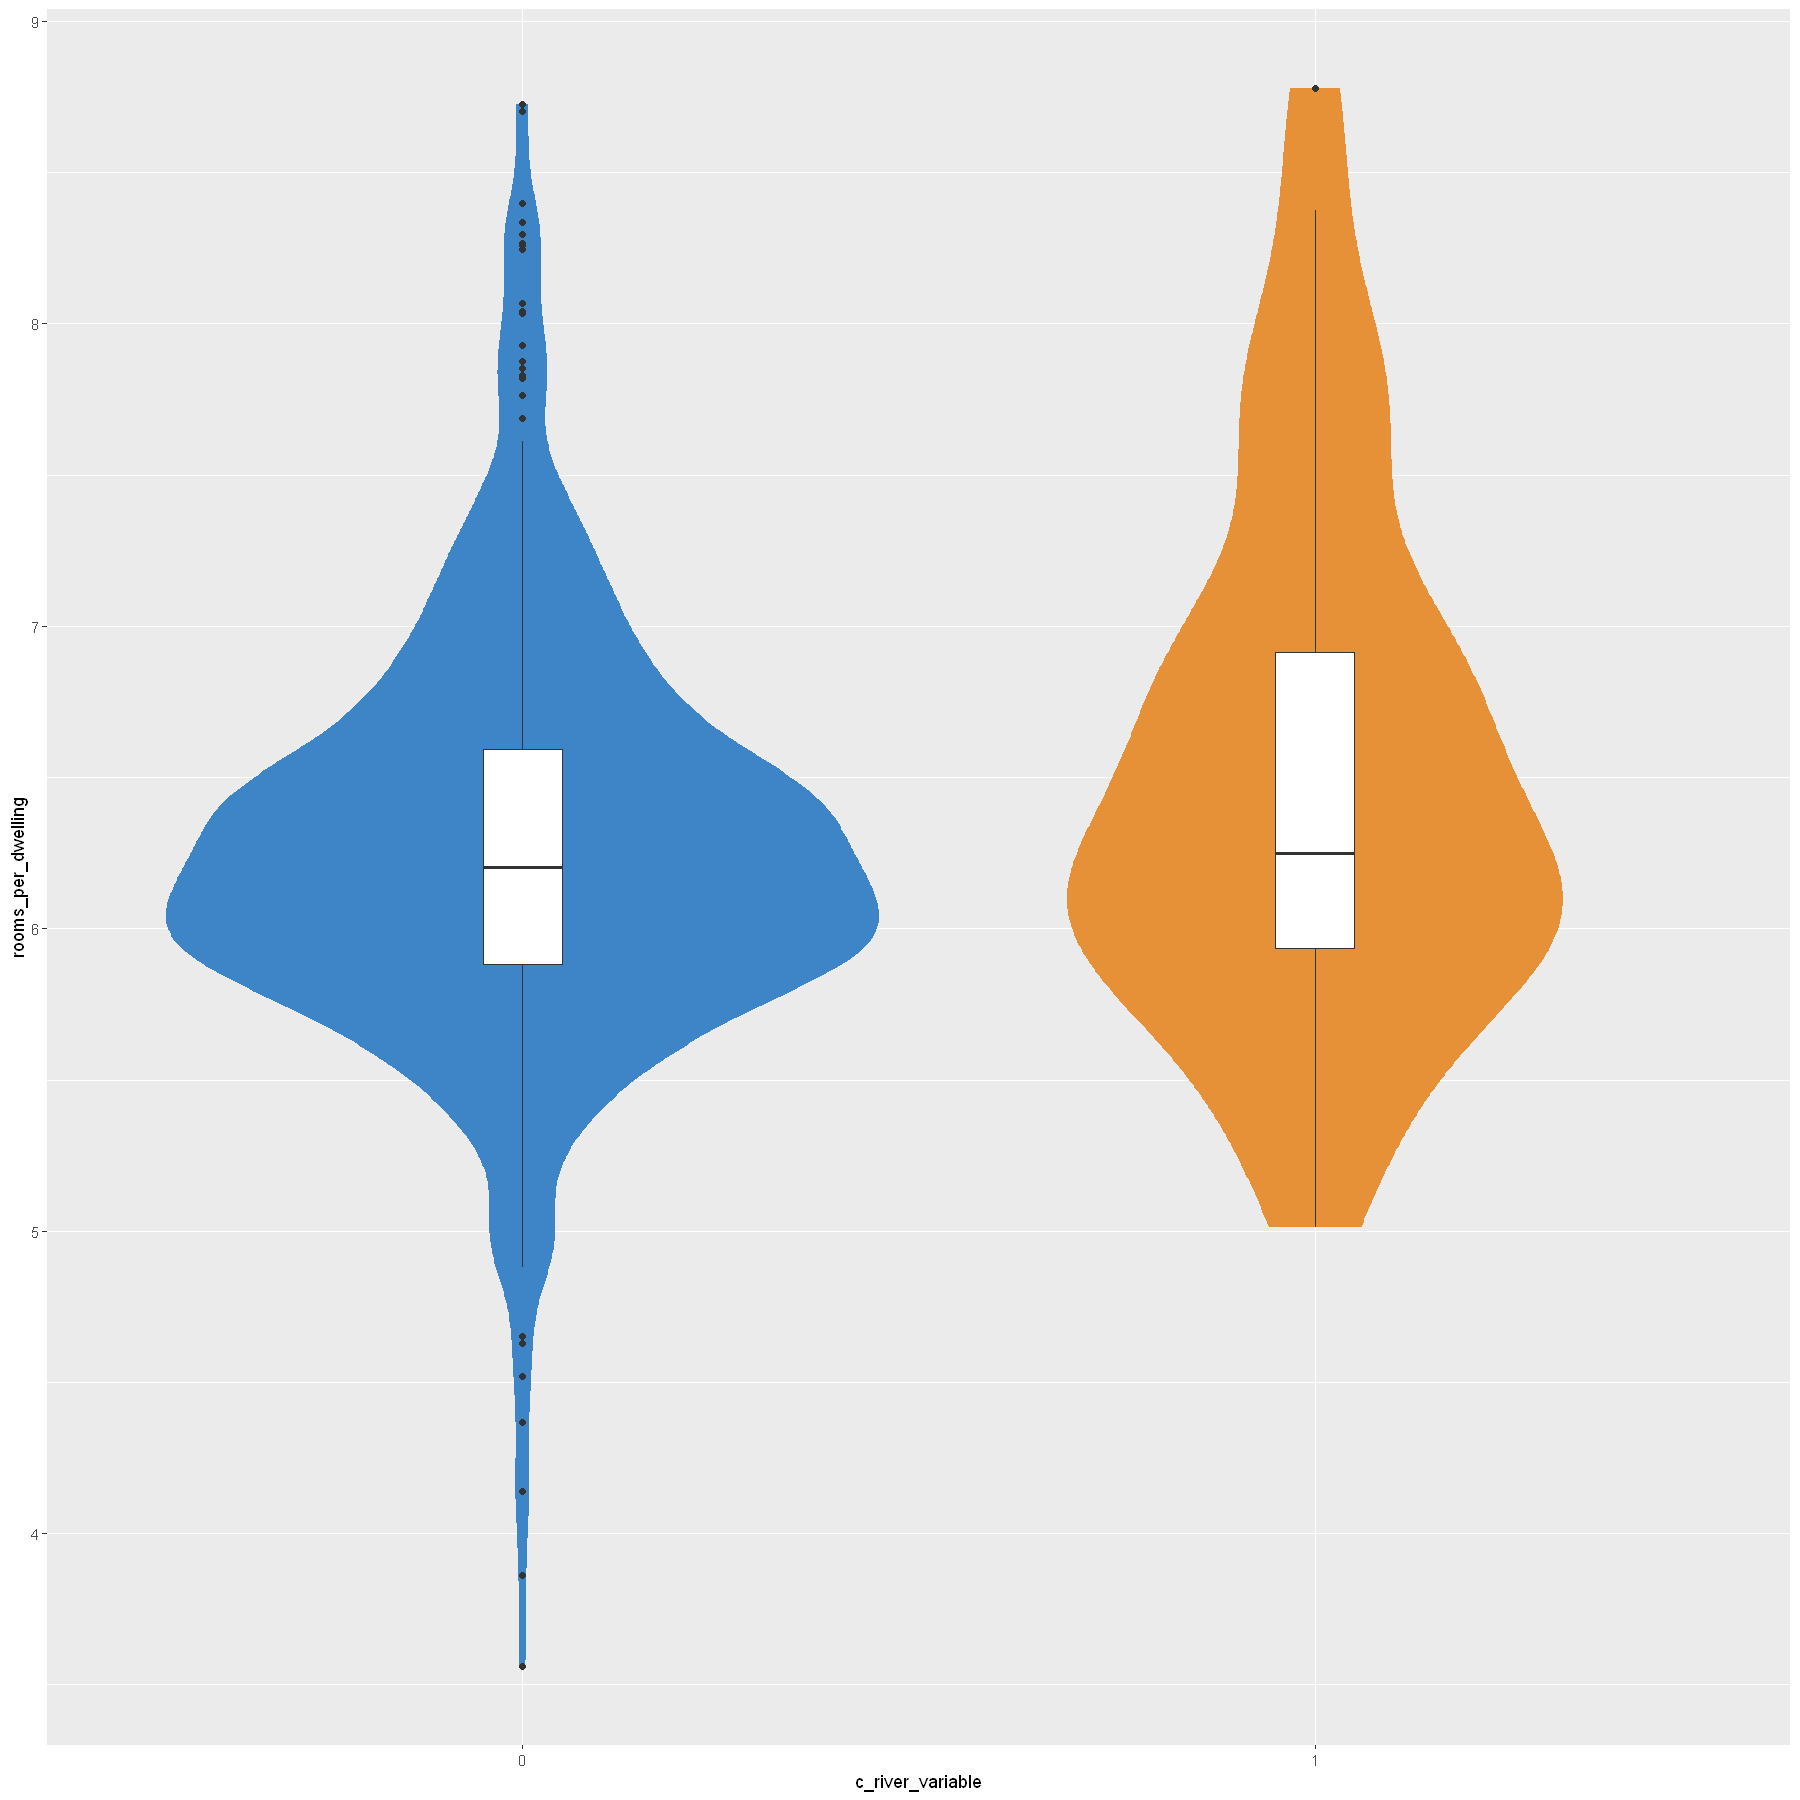

In [39]:
ggplot(df_t, aes(c_river_variable, rooms_per_dwelling)) +
  geom_violin(color = NA, aes(fill = factor(c_river_variable))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('0' = '#3d85c6', '1' = '#e69138'))

In [43]:
anova = aov(rooms_per_dwelling ~ c_river_variable, data = df_t)
summary(anova)

                  Df Sum Sq Mean Sq F value Pr(>F)  
c_river_variable   1   2.08  2.0759   4.232 0.0402 *
Residuals        504 247.23  0.4905                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Ya que la p valor es menor que 0.05, debemos de rechar hipotesis nula y por lo tanto, vemos como si la vivienda colinda con un rio si que afecta a la variable rooms_per_dwelling

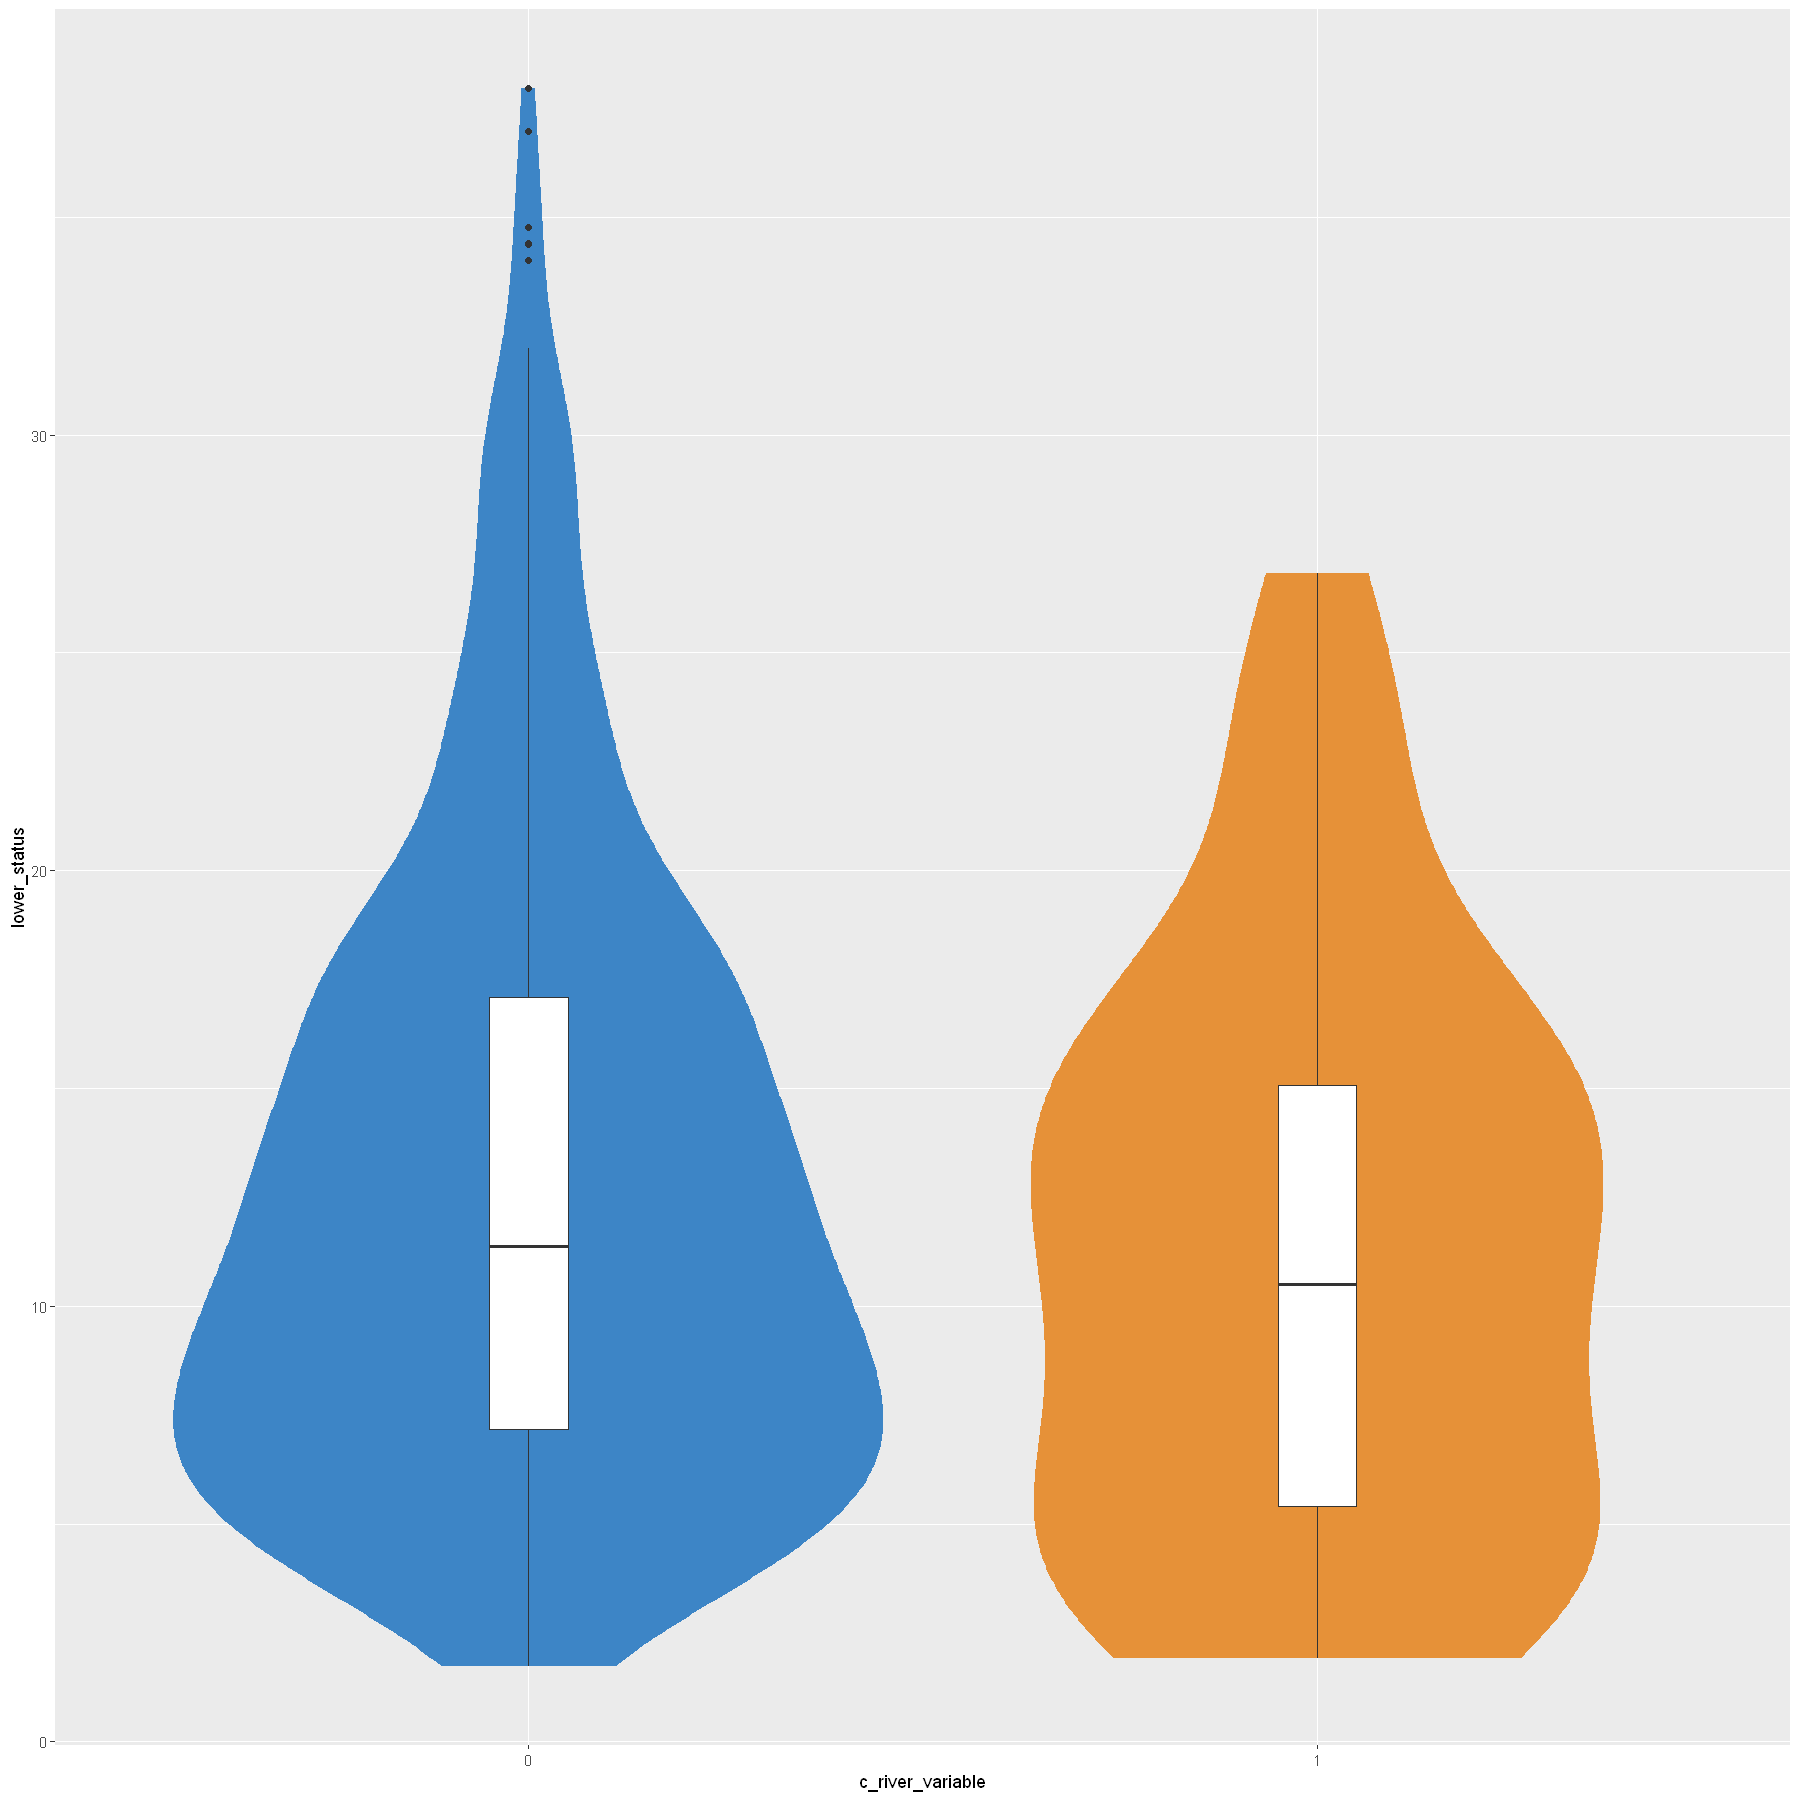

In [40]:
ggplot(df_t, aes(c_river_variable, lower_status)) +
  geom_violin(color = NA, aes(fill = factor(c_river_variable))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('0' = '#3d85c6', '1' = '#e69138'))

In [44]:
anova = aov(lower_status ~ c_river_variable, data = df_t)
summary(anova)

                  Df Sum Sq Mean Sq F value Pr(>F)
c_river_variable   1     75   74.90    1.47  0.226
Residuals        504  25677   50.95               

Todo y que lower_status no cumple homocedasticidad ni normalidad para todos los subgrupos lo analizamos igual, y según el test de anovaaceptamos hipotesis nula y podemos decir que el hecho de que colinde un rio o no, no tiene un impacto en el lower_status.

Vemos como aparentemente si colinda con un rio o no, no afecta a la variable rooms_per_dwelling ni a la lower_status, vamos a ver el comportamiento con nuestra variable objetivo. 

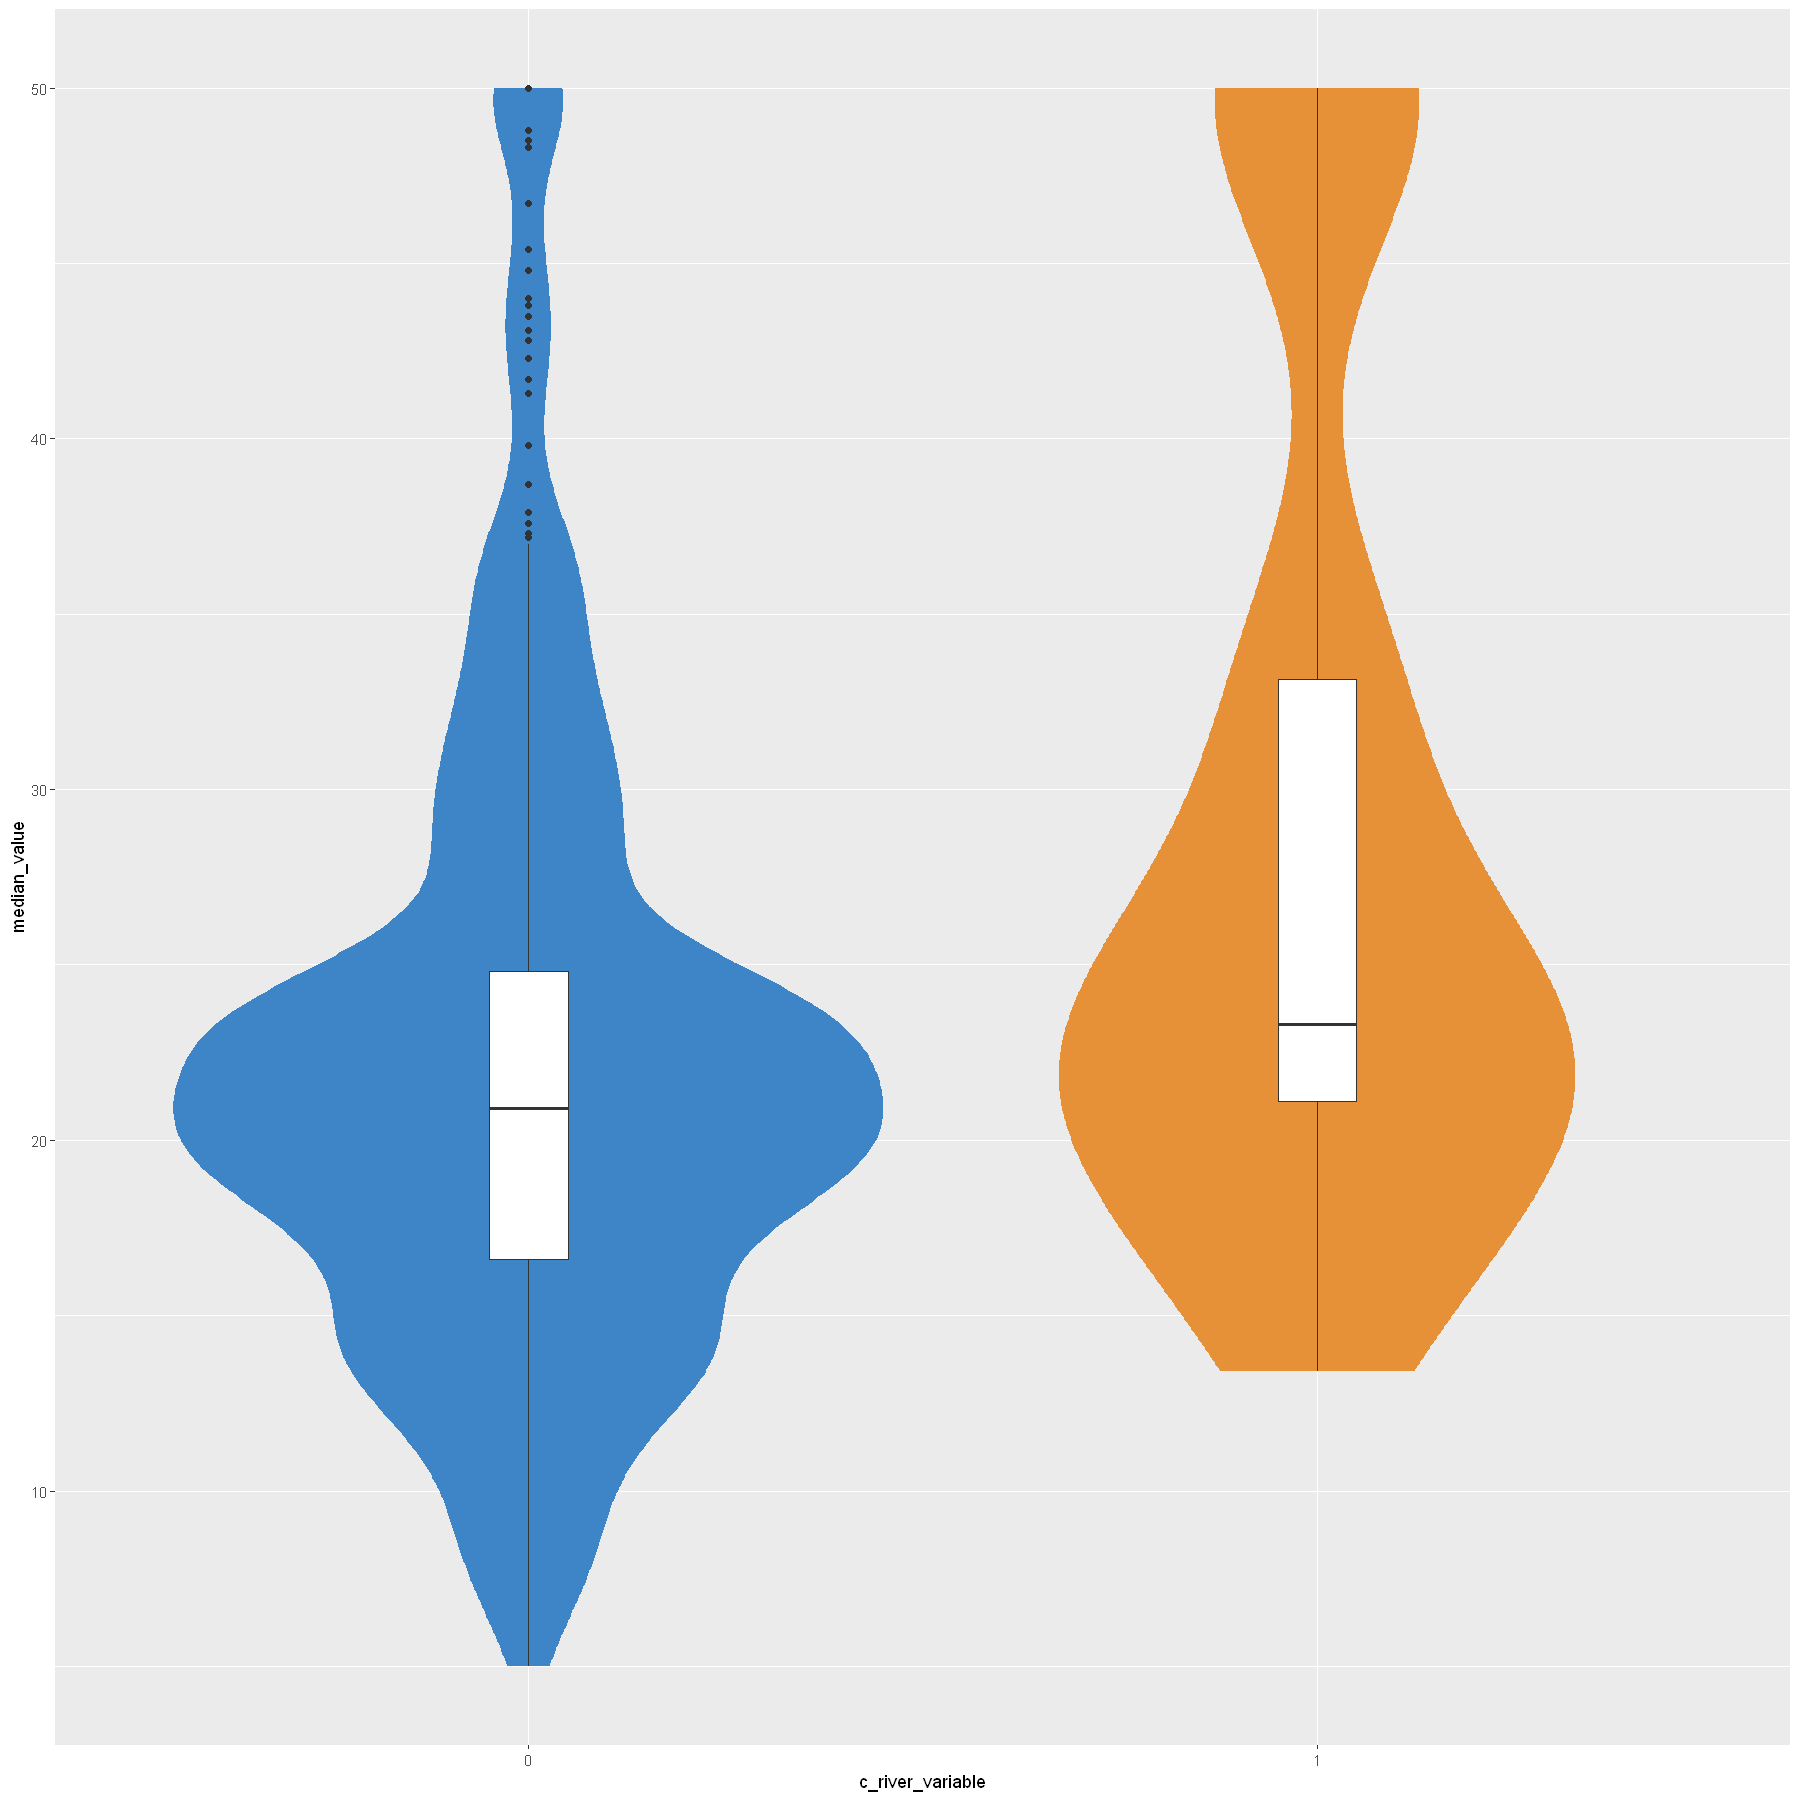

In [42]:
ggplot(df_t, aes(c_river_variable, median_value)) +
  geom_violin(color = NA, aes(fill = factor(c_river_variable))) +
  theme(legend.position = 'none') +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c('0' = '#3d85c6', '1' = '#e69138'))

In [45]:
anova = aov(median_value ~ c_river_variable, data = df_t)
summary(anova)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
c_river_variable   1   1312  1312.1   15.97 7.39e-05 ***
Residuals        504  41404    82.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Todo y que la media no cumplia normalidad, podemos notar que el hecho de que colinde con un rio puede hacer que el valor de la media sea más elevado, y el test de anova nos lo confirma numérica y visualmente con las gráficas de violín. 

## Desarrollo y justificación de las variables

Por lo tanto, una vez analizadas las correlaciones y los diferentes supuestos junto con la ANOVA, para aplicar nuestra regresión lineal, viendo que la mediana se ve afectada por la variable de c_river_variable, se debería escoger la variable rooms_per_dwelling que cumple casi todos los supuestos y además también se ve afectada por la variable c_river_variable, de esta manera generalizariamos de mejor manera el modelo.

rooms_per_dwelling


## Estudio de regresión lineal del median_value

### Comprobación de linealidad

In [46]:
print(cor.test(data_bos$median_value , data_bos$rooms_per_dwelling))


	Pearson's product-moment correlation

data:  data_bos$median_value and data_bos$rooms_per_dwelling
t = 21.722, df = 504, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6474346 0.7378075
sample estimates:
      cor 
0.6953599 



Se cumple linealidad, y vemos como la correlación es de casi el 0.7

### División Train y Test

In [47]:
set.seed(500) 

# Creamos el data partition de la función caret con un 70 - 30 split
inTrain = createDataPartition(y = data_bos$median_value
                              ,p = 0.7
                              , list = FALSE
                              , times = 1)
data_train  = data_bos[inTrain, ]
data_test = data_bos[-inTrain, ]

In [48]:
str(data_train)

'data.frame':	356 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.03237 0.06905 0.08829 ...
 $ urban_ratio       : num  18 0 0 0 12.5 12.5 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 2.18 2.18 7.87 7.87 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.458 0.458 0.524 0.524 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7 7.15 6.01 ...
 $ dwelling_age      : num  65.2 78.9 45.8 54.2 66.6 96.1 85.9 94.3 82.9 39 ...
 $ dwelling_dist     : num  4.09 49.67 60.62 60.62 55.6 ...
 $ highway_index     : int  1 2 3 3 5 5 5 5 5 5 ...
 $ tax_ratio         : int  296 242 222 222 311 311 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 18.7 18.7 15.2 15.2 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 395 397 396 ...
 $ lower_status      : num  4.98 9.14 2.94 5.33 12.43 ...
 $ median_value      : num  24 21.6 33.4 36.2 22.9 27.1 18.9 15 18.9 21.7 ...


### Modelo ajuste

In [49]:
modelo_lm = lm(median_value ~ rooms_per_dwelling , data = data_train) # Entrenamos el modelo
summary(modelo_lm)


Call:
lm(formula = median_value ~ rooms_per_dwelling, data = data_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.414  -2.811   0.176   3.099  39.270 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -33.0775     3.1902  -10.37   <2e-16 ***
rooms_per_dwelling   8.8145     0.5027   17.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.794 on 354 degrees of freedom
Multiple R-squared:  0.4648,	Adjusted R-squared:  0.4633 
F-statistic: 307.4 on 1 and 354 DF,  p-value: < 2.2e-16


El F-statistic nos dice que hay una relación directa con las variables y podemos per como el R2 es casi 0.5 con lo cual el modelo es capaz de explicar casi la mitad de los datos.

### Normalidad del modelo


	Shapiro-Wilk normality test

data:  modelo_lm$residuals
W = 0.92198, p-value = 1.176e-12


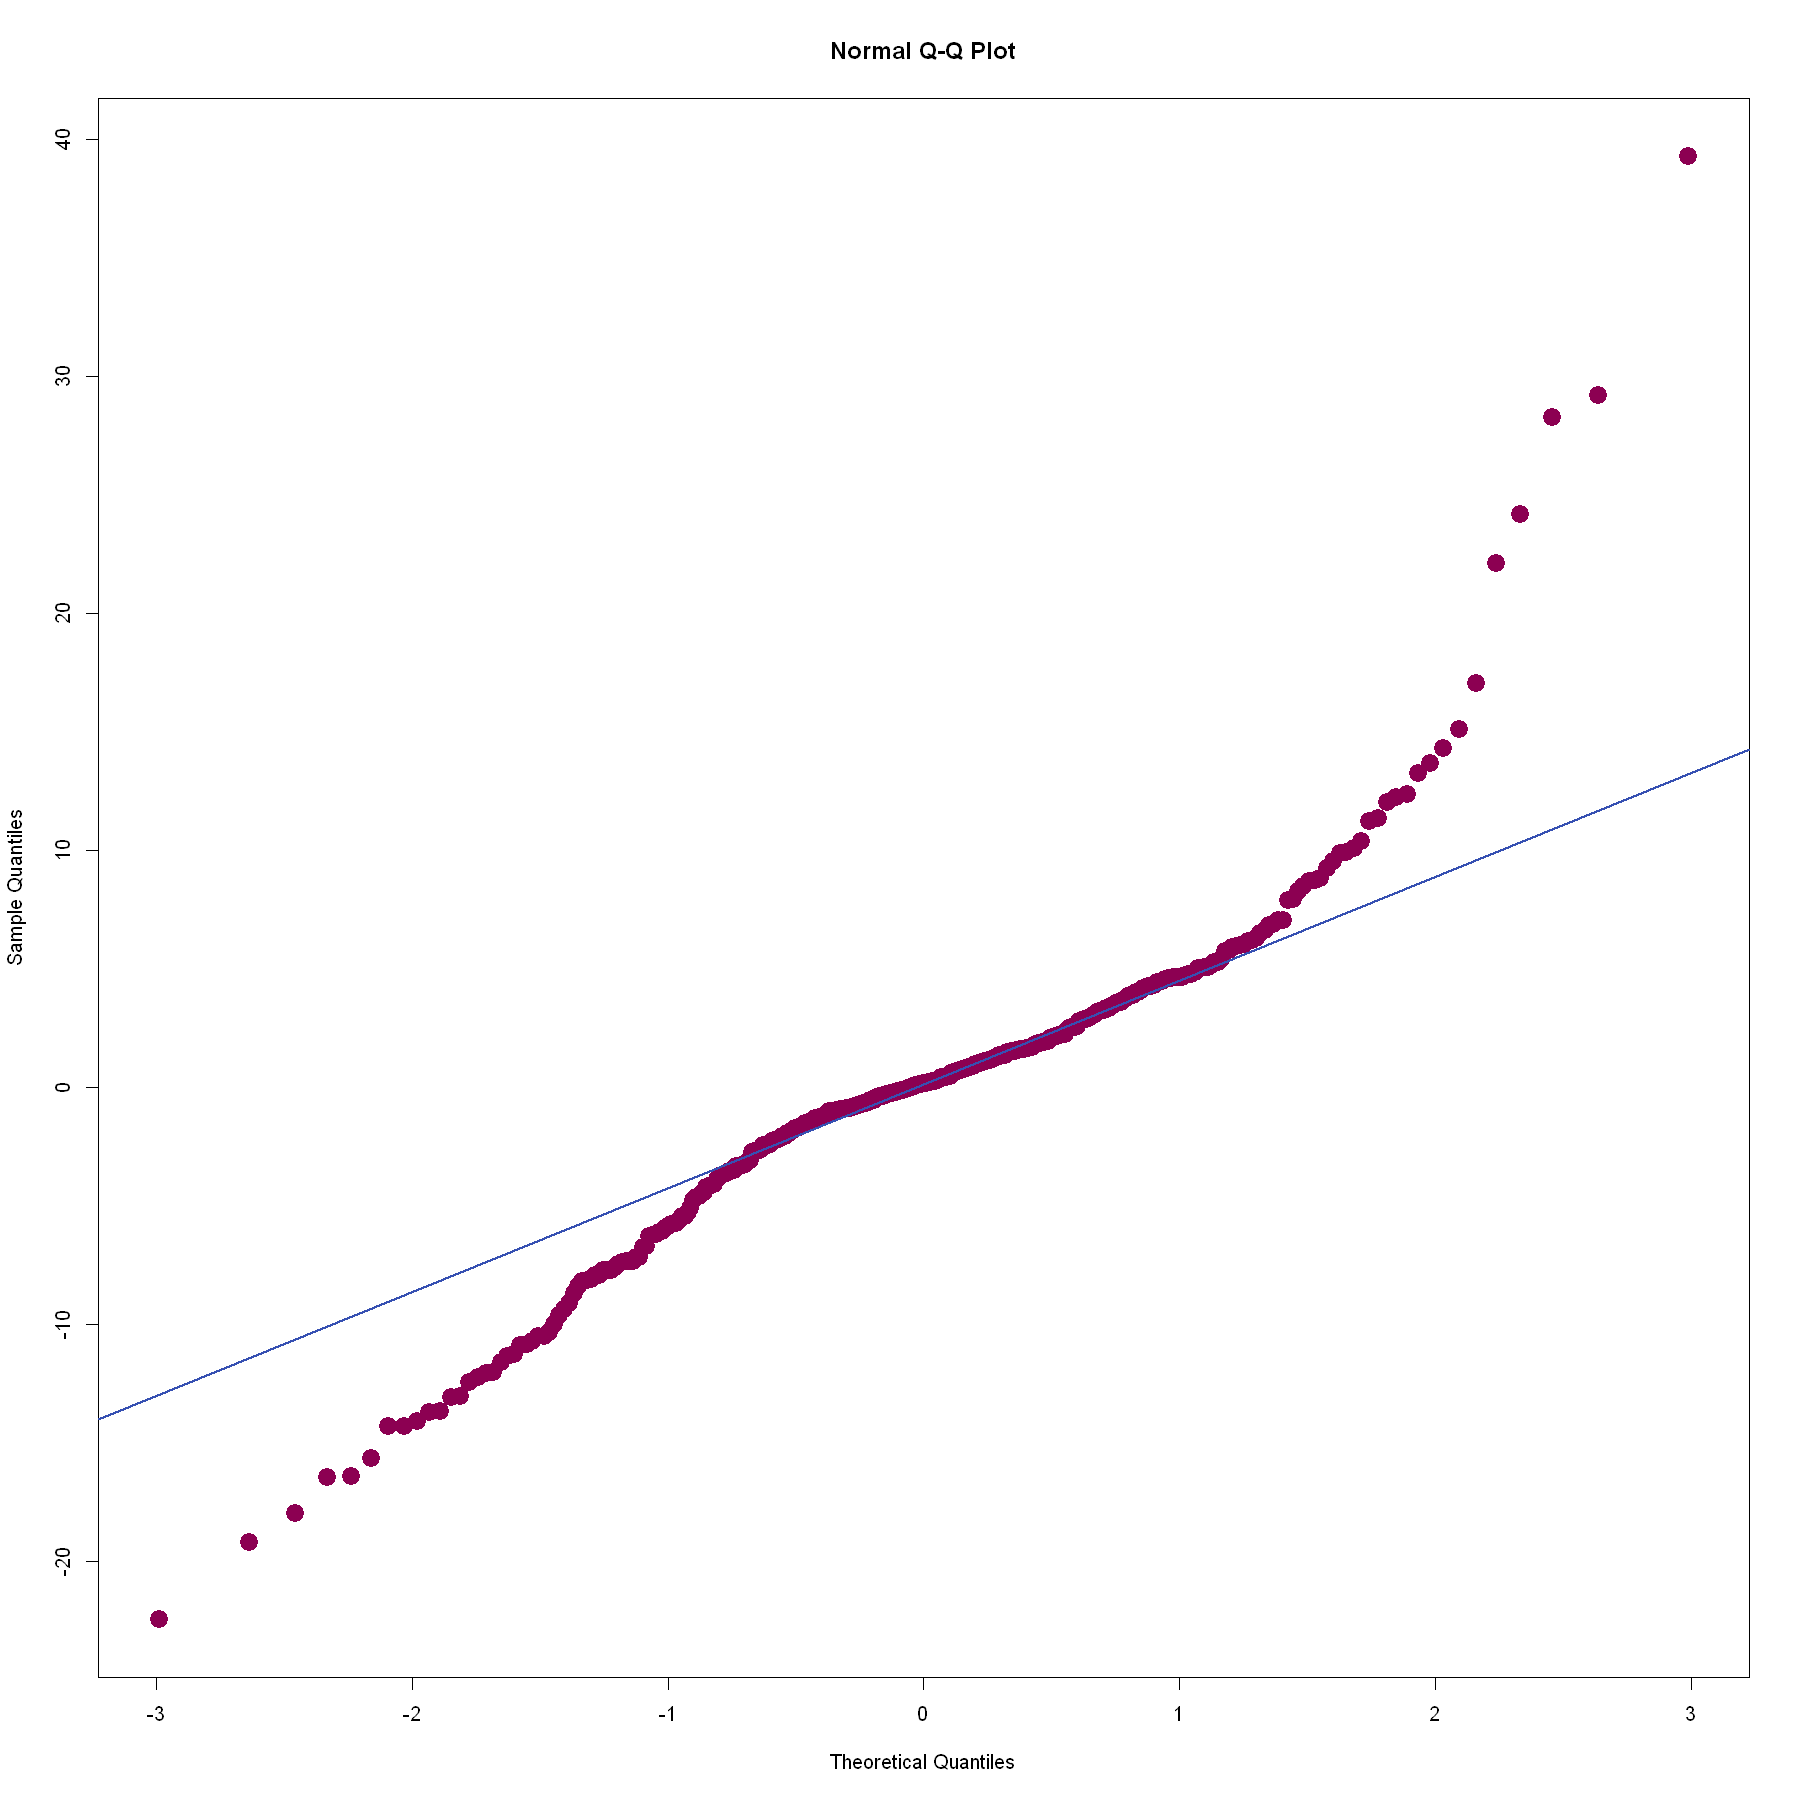

In [50]:
# Visualization
qqnorm(modelo_lm$residuals,pch =19,col ="#8c0052", cex=2)
qqline(modelo_lm$residuals , col = "#3650b2", lwd = 2 )

# Statistical Test
shapiro.test(modelo_lm$residuals)

Claramente, rechazamos hipotesis nula y se puede ver como no sigue una distribución normal. 

### Homocedasticidad


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 0.2642, df = 1, p-value = 0.6072


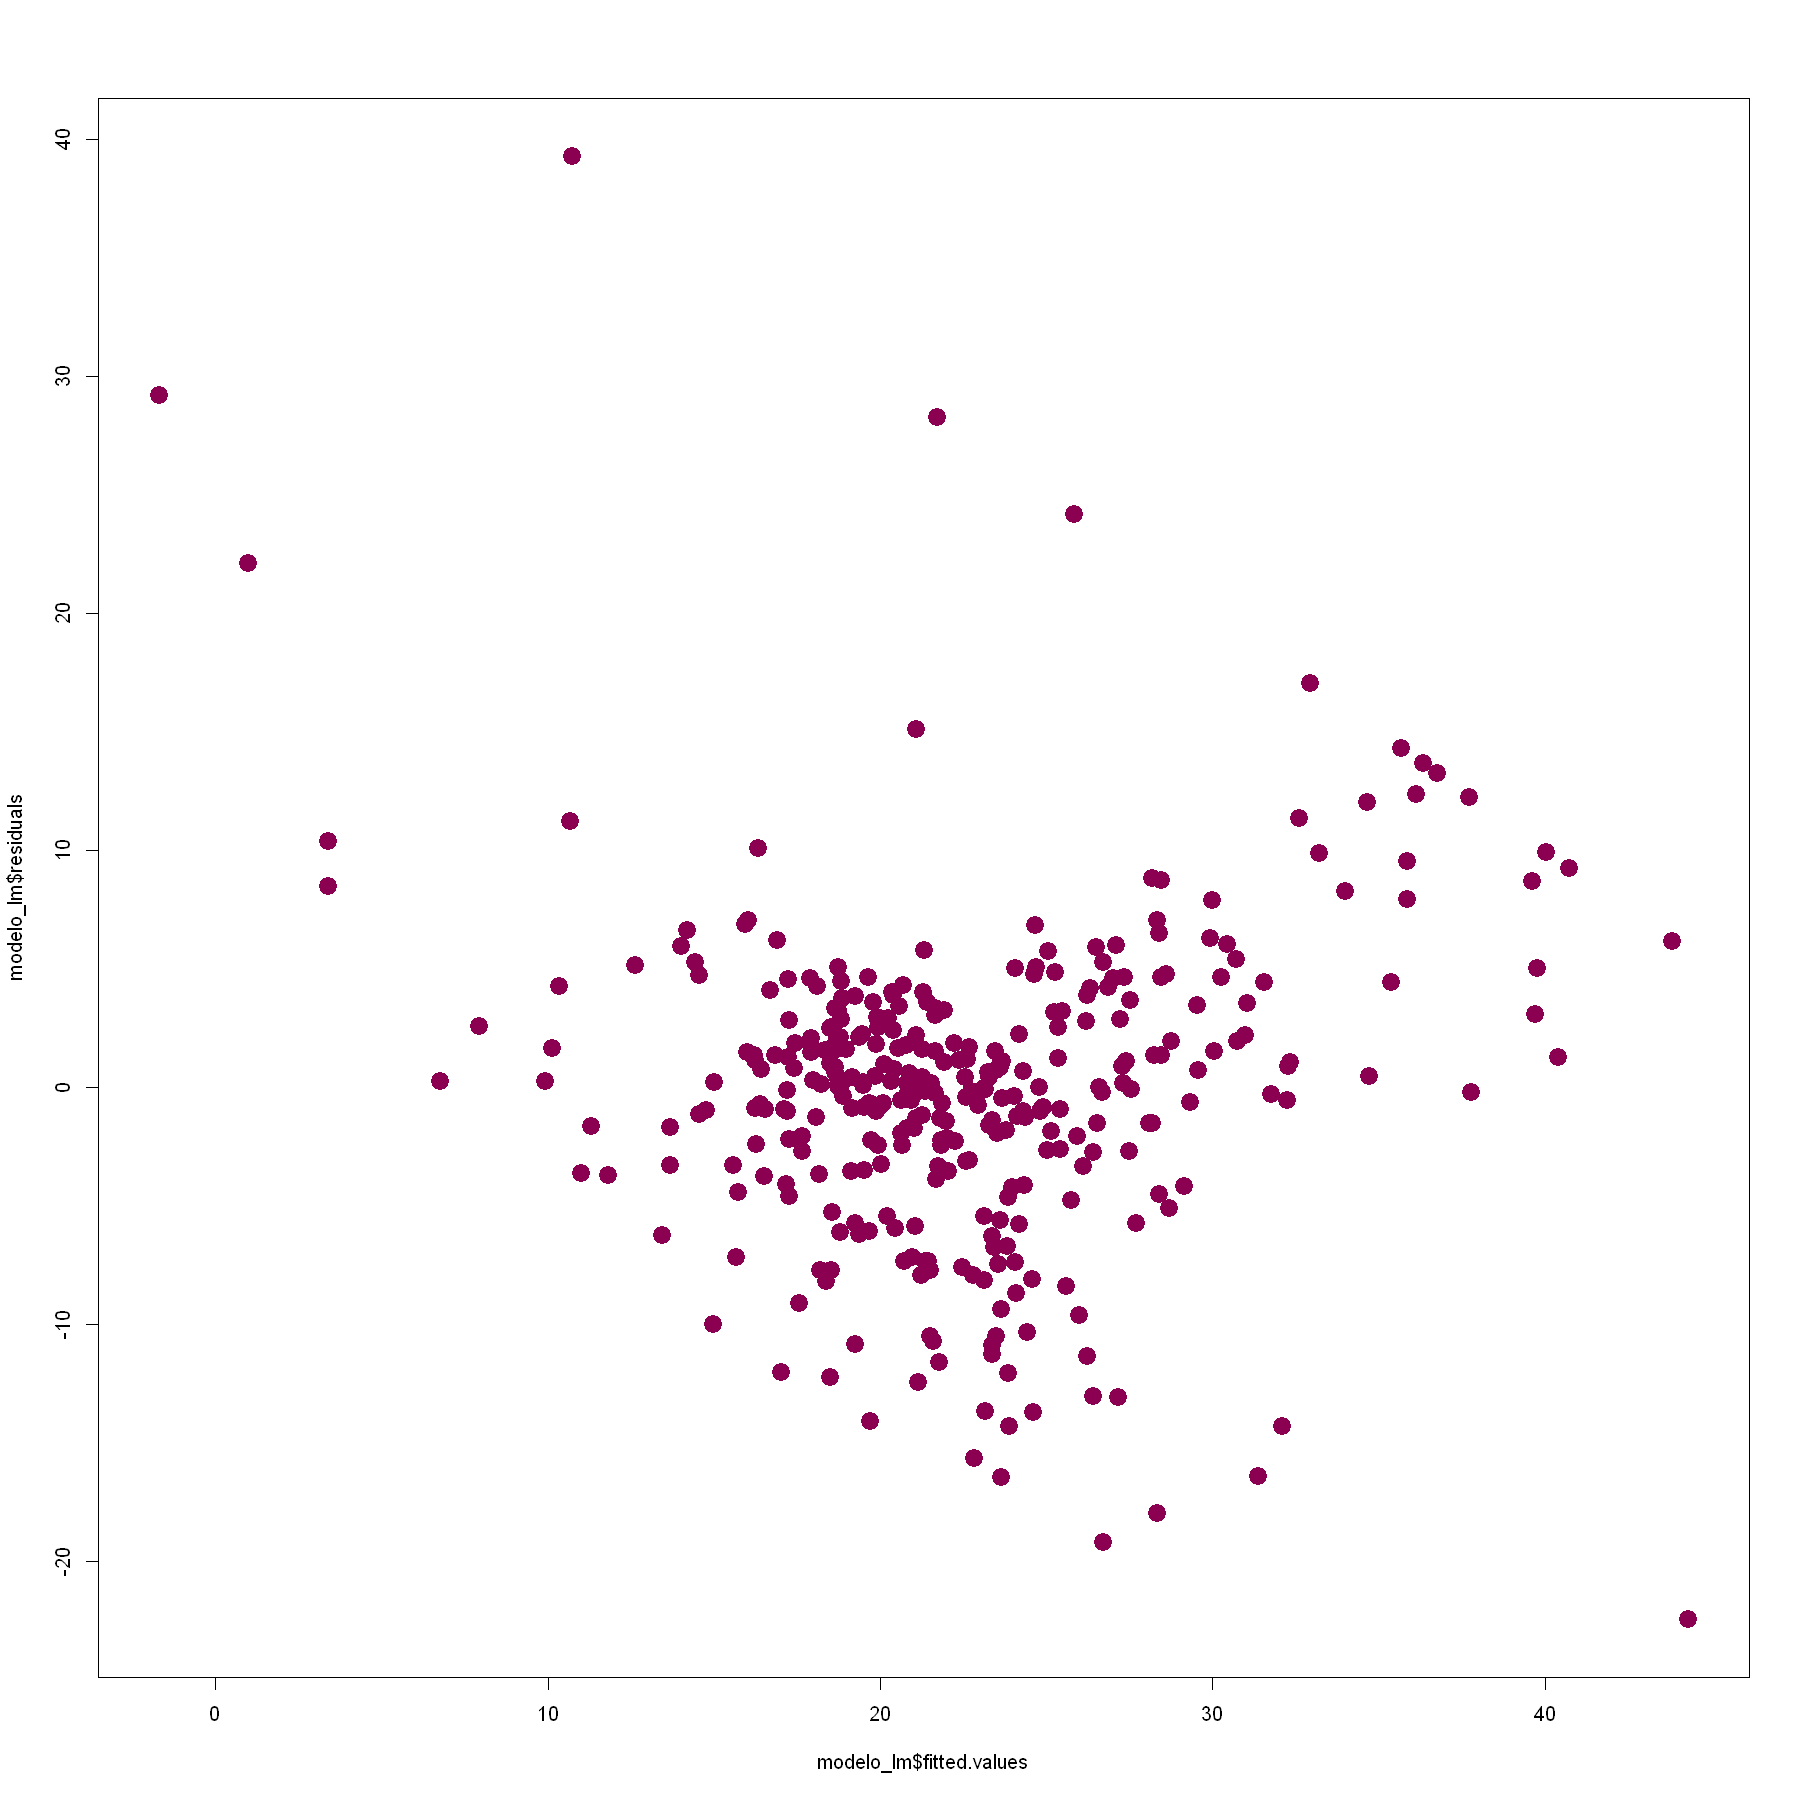

In [51]:
# Visualization
plot(modelo_lm$fitted.values , modelo_lm$residuals , pch =19,col ="#8c0052", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm)

Aceptamos hipotesis nula y por lo tanto si que cumple homocedasticidad, por lo tanto tenemos una homogeniedad en las varianzas de los errores, lo que es un buen indicativo para un modelo de regresión lineal.

### Autocorrelación



	Durbin-Watson test

data:  modelo_lm
DW = 0.72306, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


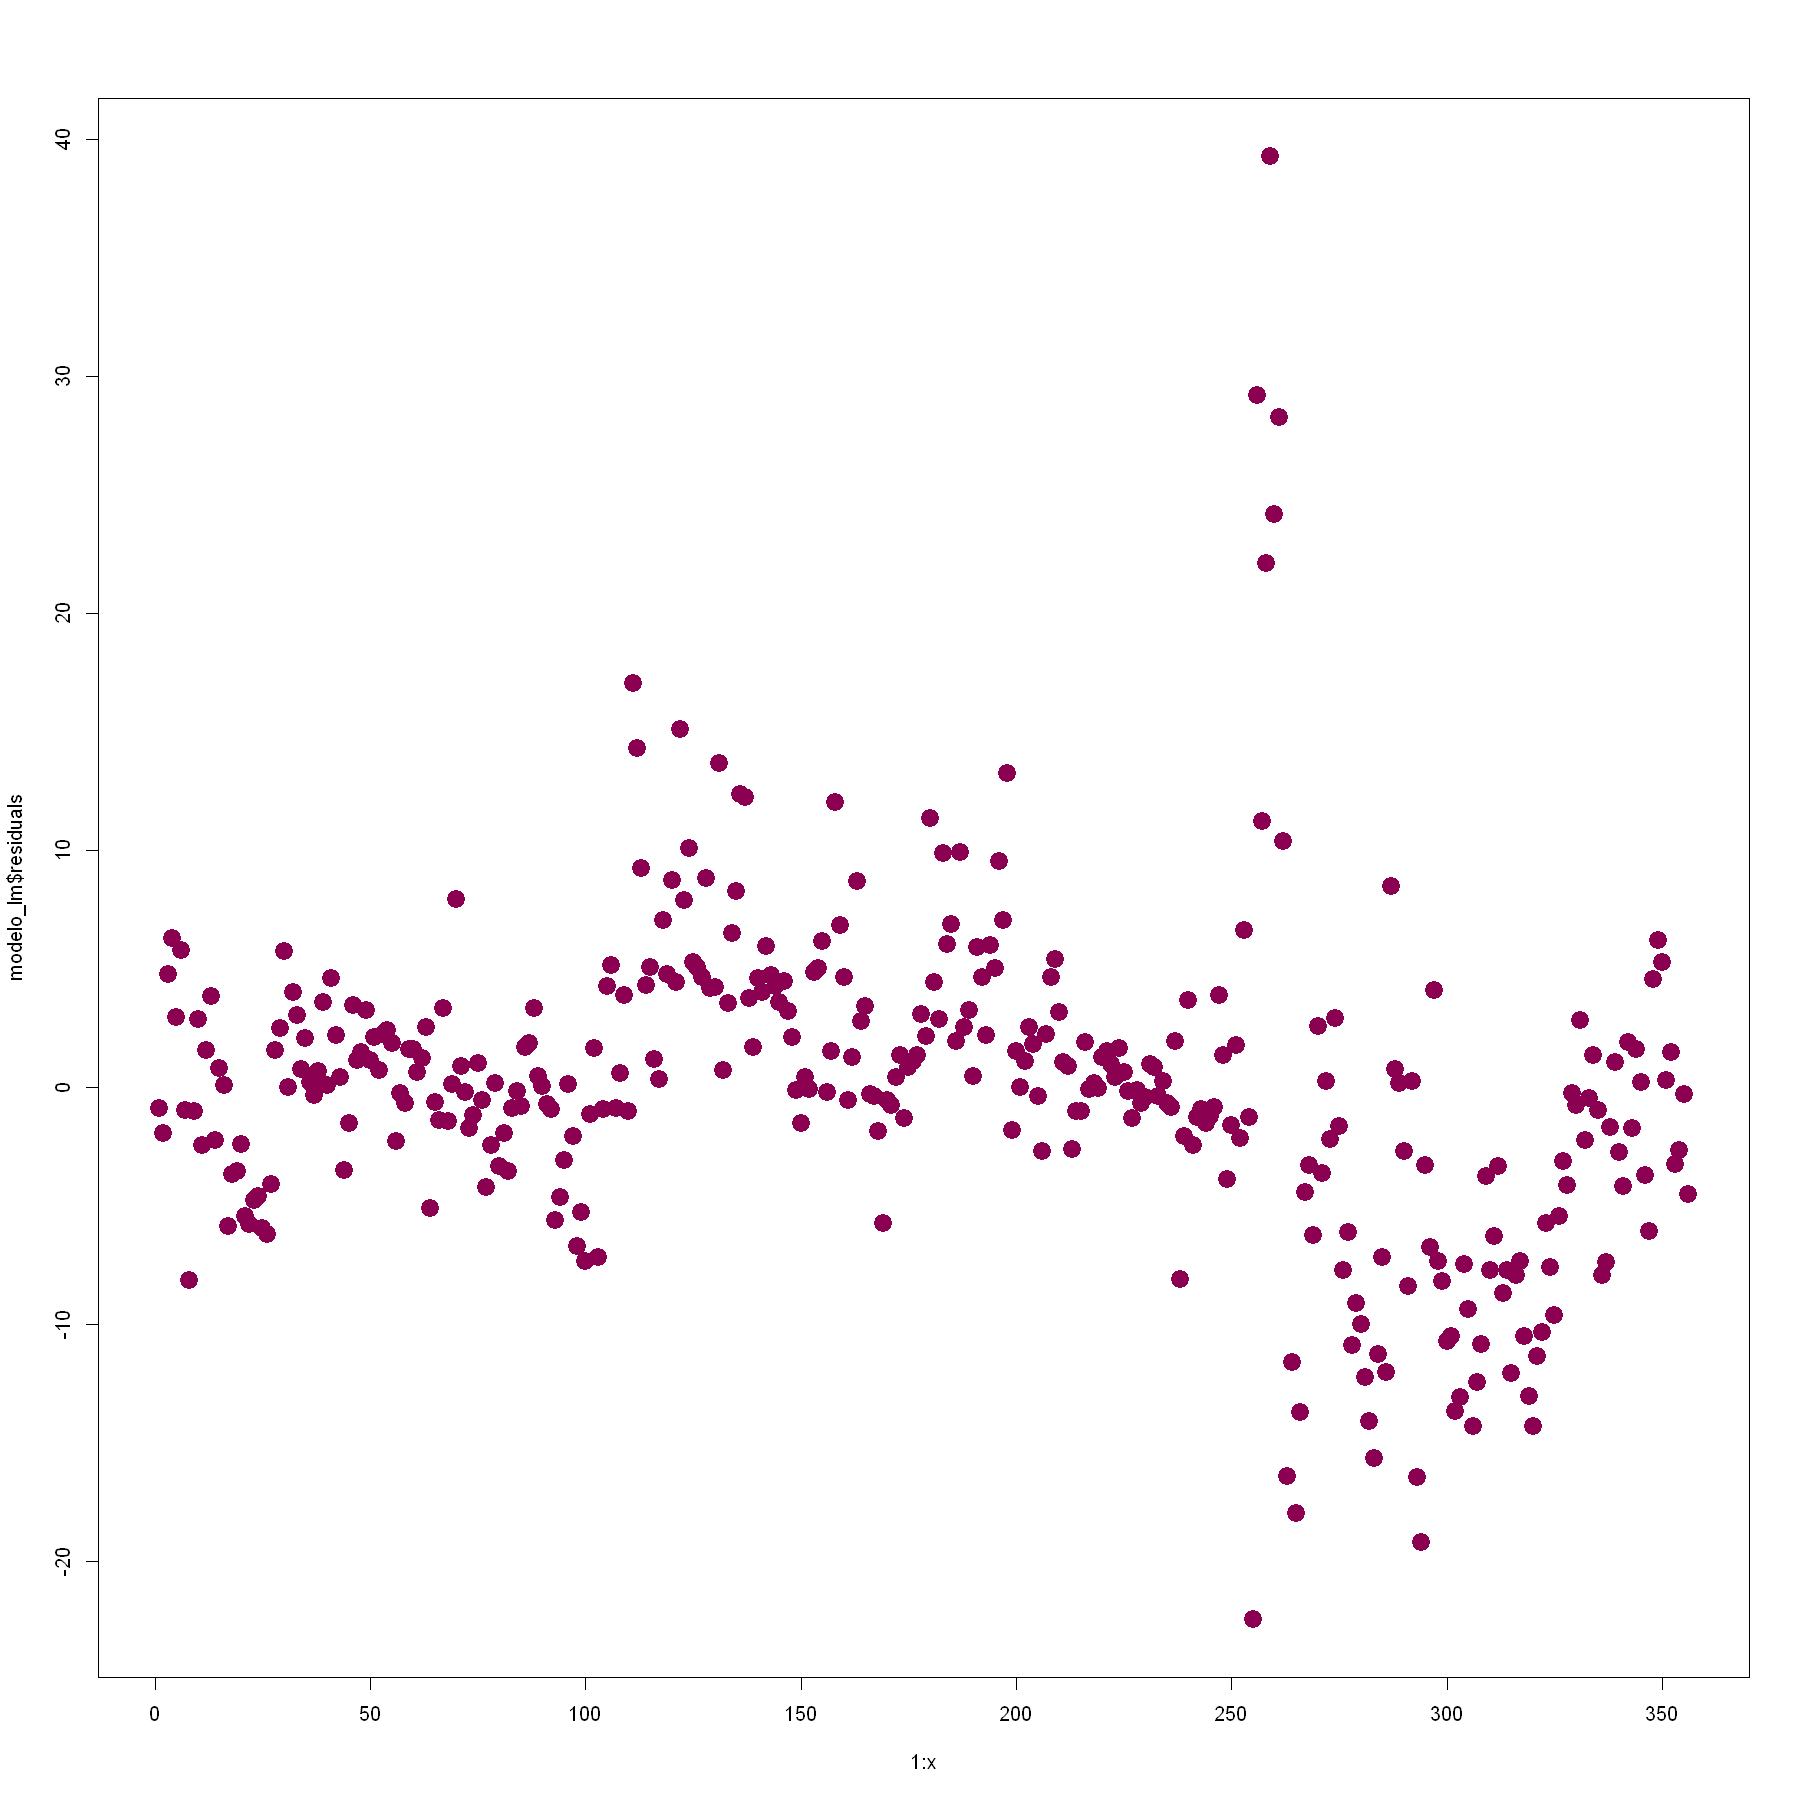

In [52]:
x <- length(modelo_lm$residuals)
# Visualization


plot(1:x,modelo_lm$residuals, pch =19,col ="#8c0052", cex=2)

# Statistical Test
dwtest(modelo_lm,  alternative = c("two.sided"))

### Media de errores

In [53]:
# Calcular la media de errores
print(mean(modelo_lm$residuals))

[1] -4.575699e-16


Las suposiciones del modelo lineal se cumplen puesto que los valores son muy cercanos a 0

### Detección de outliers

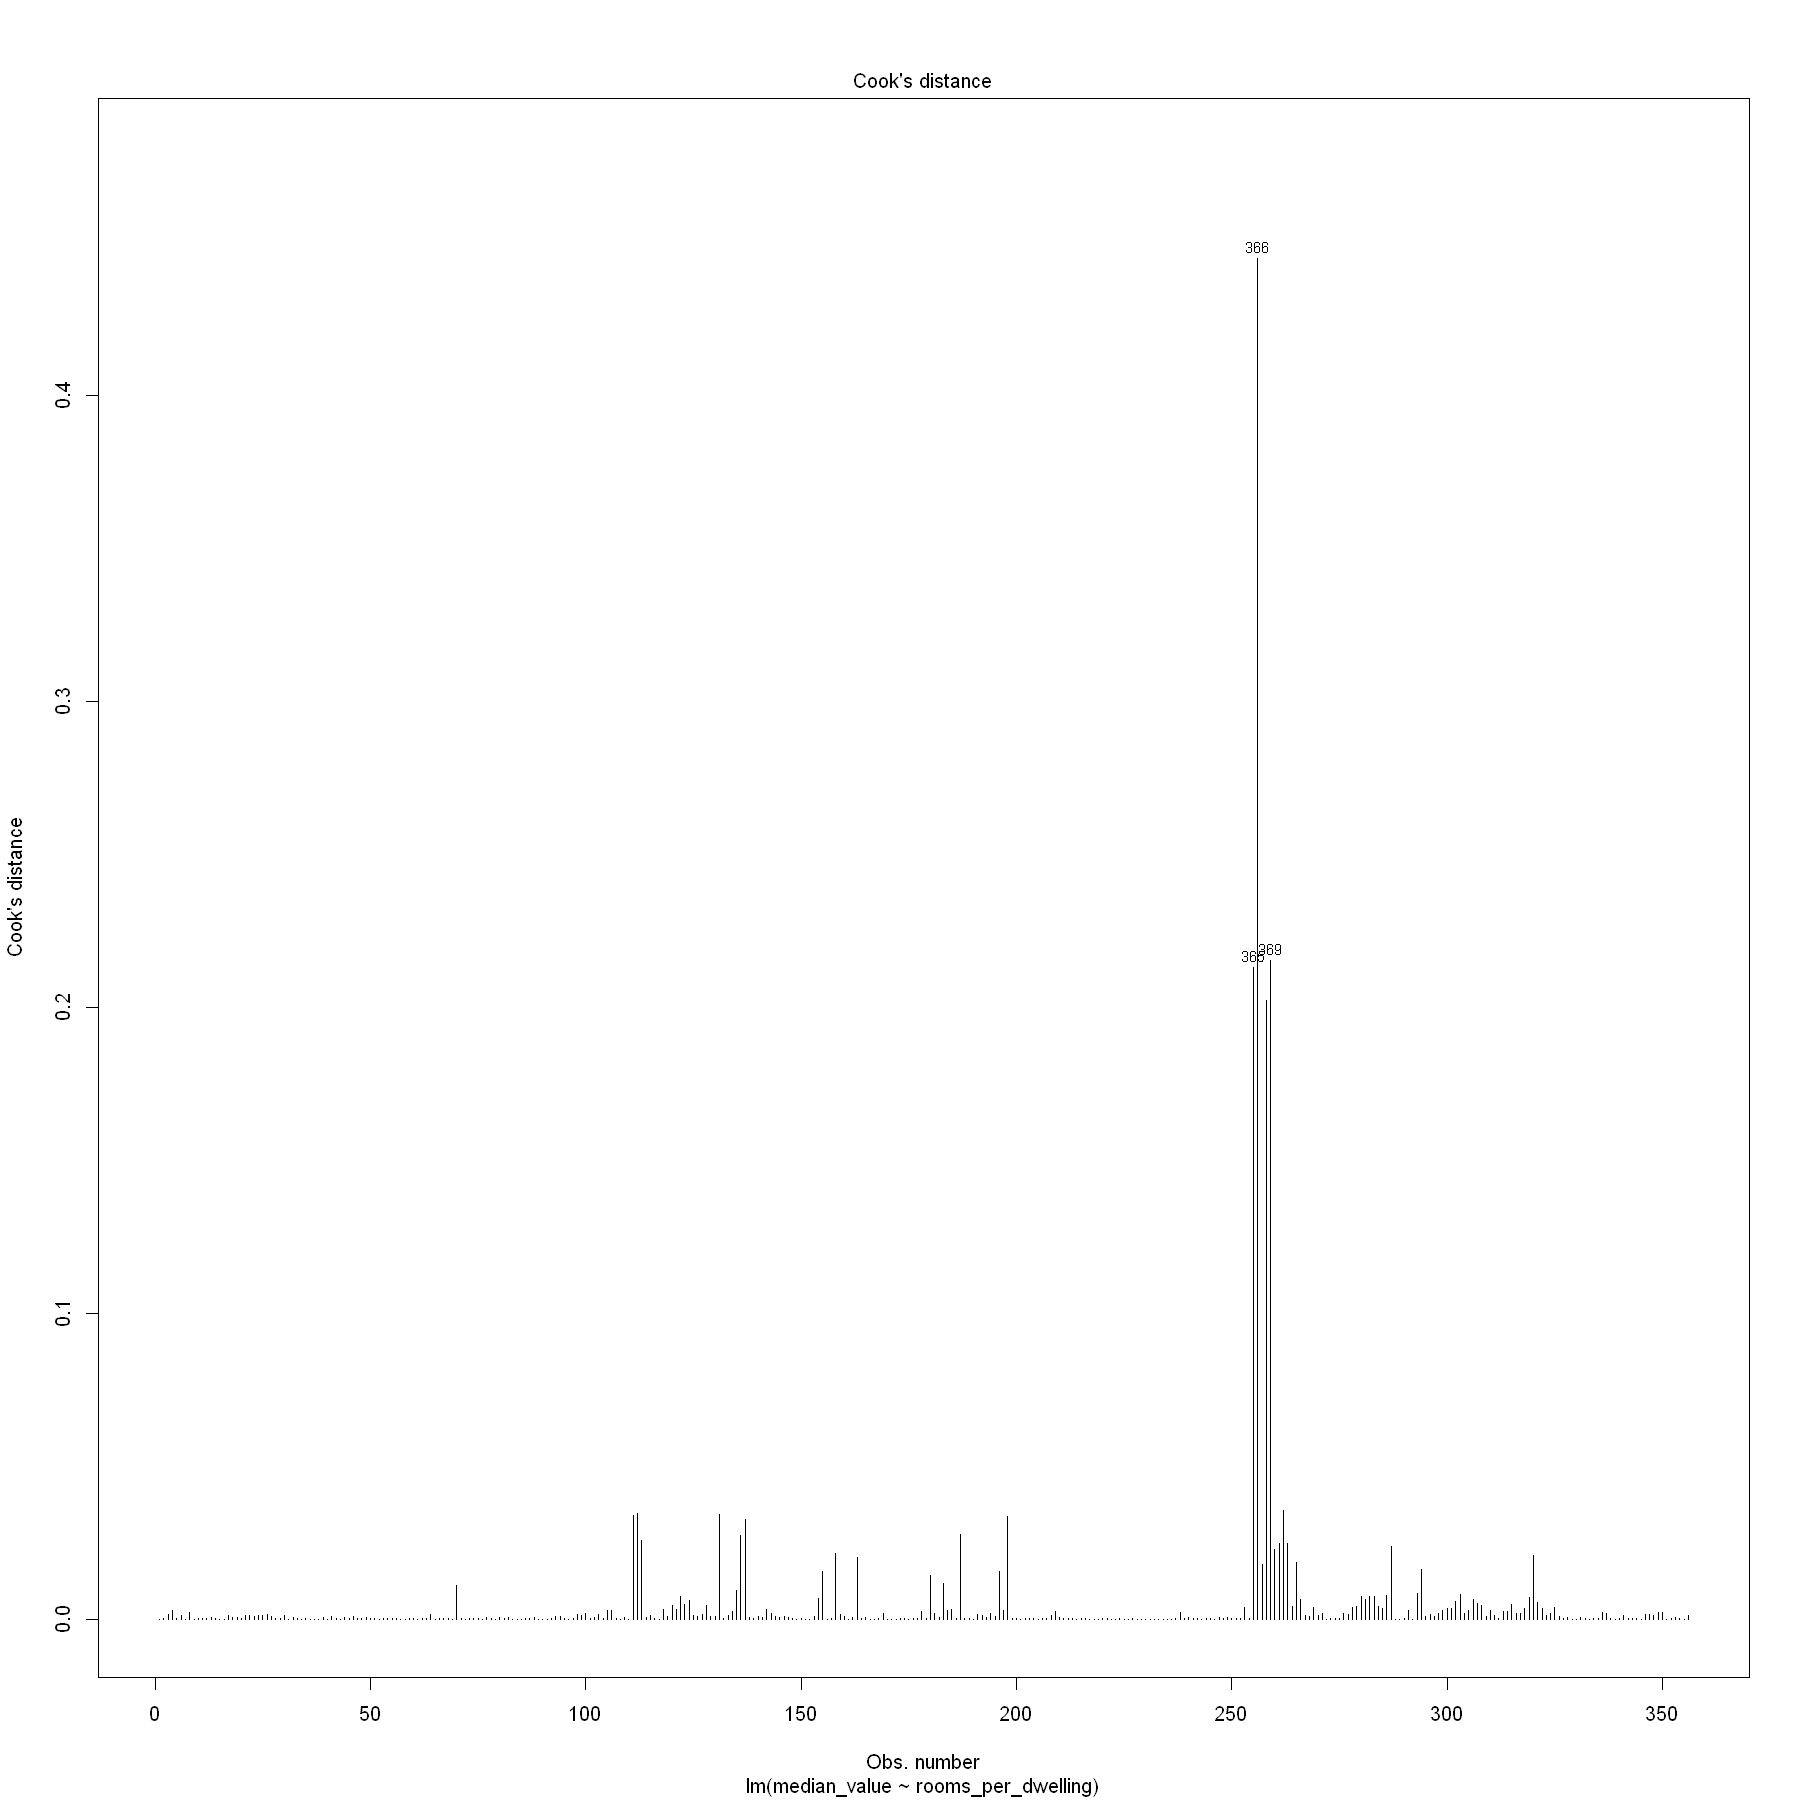

In [54]:
# Visualization (Cook's distance plot)
plot(modelo_lm , 4)
# Statistical Measure: 
model_dm = augment(modelo_lm)

In [55]:
# Calcular la distancia de Cook para cada observación

n <- nrow(model_dm) # Número total de observaciones
umbral <- 4/n
outliers <- which(model_dm$.cooksd > umbral) # Índices de las observaciones consideradas outliers

# Imprimir los índices de los outliers de la variable incidencerate
print(length(outliers))
outliers

[1] 27


[1] 111 112 113 131 136 137 155 158 163 180 183 187 196 198 255 256 257 258 259
[20] 260 261 262 263 265 287 294 320

El modelo tiene 27 outliers, los cuales puede ser que se traten de aquellos que se comentaron en analisis previos que estaban en la parte superior y al mismo nivel en el eje de las y.

### Validación del modelo

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.5406673,6.19859,4.230943


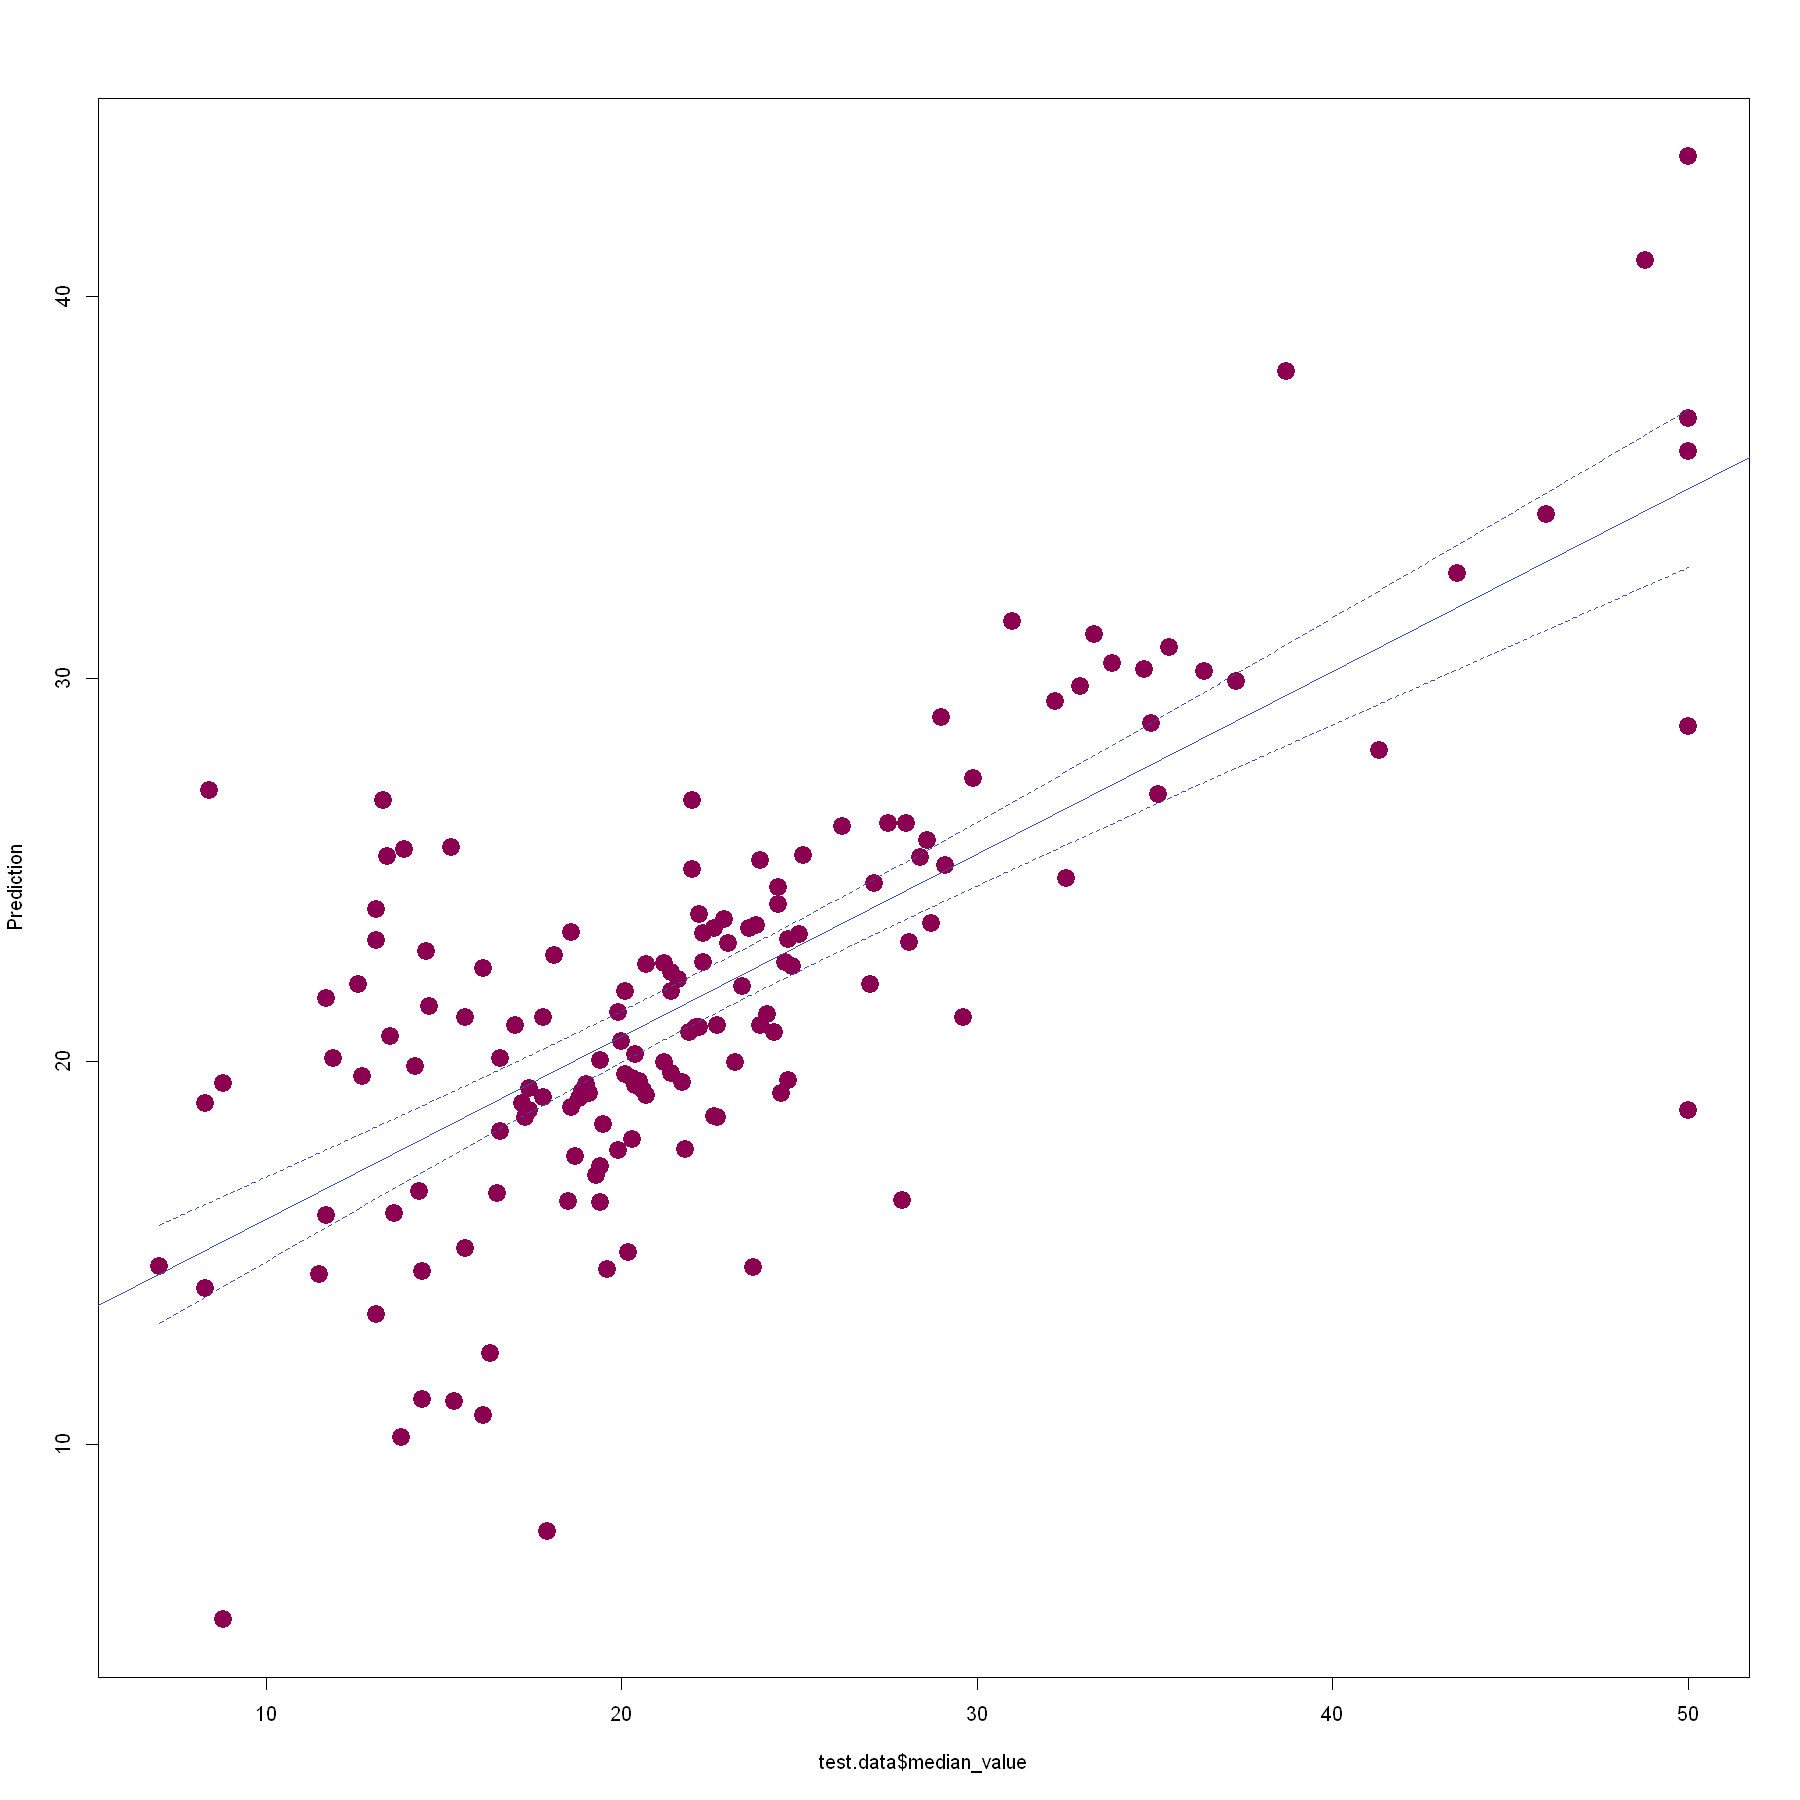

In [58]:
# Making prediction

prediction = predict(modelo_lm, data_test)

### Visualization
plot(data_test$median_value,prediction, xlab="test.data$median_value", ylab="Prediction", pch =19,col ="#8c0052", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ median_value, data = data_test)

newx = seq(min(data_test$median_value),max(data_test$median_value),by = 0.05)

conf_interval = predict(lm.out, newdata=data.frame(median_value=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "#3650b2")

#add conf_interval lines
lines(newx, conf_interval[,2], col="#3650b2", lty=2)
lines(newx, conf_interval[,3], col="#3650b2", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, data_test$median_value),
            RMSE = RMSE(prediction, data_test$median_value),
            MAE = MAE(prediction, data_test$median_value))

Vemos que todo y que el R cuadrado es superior al 0.5, lo que significa que es capaz de explicar un poco más de la mitad del modelo, la linea de regresión no es del todo clara, parece que hay una forma más de embudo que de linea recta. Aunque cabe decir que el error en magnitud es de 6.000 euros, y este podría ser razonable, ya que no simplemente se usan las habitación para valorar el valor de una vivienda, también hay otros factores como se ha podido observar en el analísis. Sin embargo para una primera aproximación, esta primera regresión linean nos podría dar una idea de en el caso de querer vender o querer comprar como esta el precio en el mercado. Por lo tanto, visto el caso de uso, y las circumstancias, pese a no ser la mejor regresión lineal, si que la usarí apara tener una primera aproximación. 